<a href="https://colab.research.google.com/github/alouvre/BPDS_DicodingSubmission_Proyek_Pertama_Dashboard_HR/blob/main/BPDS_Submission_Proyek_Pertama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Pertama : Menyelesaikan Permasalahan departemen Human Resources (HR) di Perusahaan Jaya Maju

- Nama: Alifia Mustika Sari
- Email: alifiamustika02@gmail.com
- ID Dicoding:

## Business Understanding

### Latar Belakang

Jaya Jaya Maju adalah perusahaan multinasional yang telah beroperasi sejak tahun 2000 dengan lebih dari 1000 karyawan yang tersebar di seluruh penjuru negeri. Meskipun telah menjadi perusahaan besar, Jaya Jaya Maju masih menghadapi tantangan serius dalam pengelolaan karyawan. Salah satu indikator utama dari permasalahan ini adalah tingginya tingkat attrition rate (rasio karyawan yang keluar terhadap total karyawan), yang mencapai lebih dari 10%.

Tingginya angka ini dikhawatirkan akan berdampak pada produktivitas, efisiensi operasional, dan stabilitas perusahaan dalam jangka panjang. Oleh karena itu, manajemen HR ingin mengidentifikasi faktor-faktor utama yang memengaruhi tingginya tingkat pergantian karyawan dan membuat sistem pemantauan yang efektif.

### Permasalahan Bisnis

Bagaimana Jaya Jaya Maju dapat mengurangi tingkat pergantian karyawan yang tinggi untuk meningkatkan produktivitas, efisiensi operasional, dan stabilitas bisnisnya di masa depan?

Pertanyaan utama ini dapat diuraikan menjadi beberapa sub-masalah:
- Apa faktor-faktor utama yang menyebabkan tingginya tingkat attrition di Jaya Jaya Maju?
- Bagaimana kepuasan kerja, keseimbangan kehidupan kerja, pengembangan karir, dan budaya organisasi saat ini mempengaruhi keputusan karyawan untuk tetap atau keluar dari perusahaan?
- Strategi apa yang dapat diterapkan oleh manajemen untuk meningkatkan retensi dan kepuasan karyawan?
- Bagaimana model machine learning dapat membantu memprediksi risiko karyawan keluar dari perusahaan secara dini?

### Tujuan Proyek

- Mengidentifikasi faktor-faktor utama yang berkontribusi terhadap tingginya attrition rate.
- Menyediakan alat bantu visual berupa dashboard interaktif untuk membantu HR memantau tren dan distribusi data karyawan.
- Mengembangkan model prediktif yang dapat membantu perusahaan dalam pengambilan keputusan strategis terkait retensi karyawan.

### Cakupan Proyek

Untuk menjawab permasalahan di atas, proyek ini memiliki dua fokus utama:

- Pembuatan Business Dashboard

    Dashboard ini akan digunakan untuk memantau berbagai faktor yang memengaruhi tingginya attrition rate karyawan berdasarkan data historis. Visualisasi akan mencakup metrik-metrik penting seperti distribusi usia, tingkat kepuasan kerja, kebiasaan lembur, hingga distribusi berdasarkan departemen atau jabatan.

- Pengembangan Model Machine Learning

    Proyek ini juga mencakup pembuatan model machine learning yang mampu memprediksi kemungkinan seorang karyawan akan keluar dari perusahaan (attrition prediction). Model ini bertujuan untuk membantu tim HR mengidentifikasi karyawan yang berisiko tinggi keluar lebih awal, sehingga intervensi atau strategi retensi dapat dilakukan secara proaktif. Untuk itu, akan disusun skrip Python sederhana sebagai bagian dari proses prediksi ini.

## **1. Persiapan Proyek**

### Menyiapkan Library

In [ ]:
!pip install lazypredict

In [ ]:
!pip install pandas sqlalchemy

ERROR: Operation cancelled by user
^C


In [ ]:
# ==========================
# 🔗 Mount Google Drive & Navigasi ke Folder Proyek
# ==========================
from google.colab import drive
import os  # Untuk navigasi dan pengelolaan path
import shutil
import joblib

# ==========================
# ⚙️ Konfigurasi Umum
# ==========================
import pandas as pd
import numpy as np
import random
import warnings

# ==========================
# 📊 Visualization
# ==========================
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi warning & seed
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

seed = 0
np.random.seed(seed)
random.seed(seed)

# ==========================
# 🧠 Machine Learning & Preprocessing
# ==========================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score
)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Menyiapkan Gdrive Proyek

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path tujuan proyek di Google Drive
target_path = '/content/drive/MyDrive/BPDS/Proyek_Pertama'

# Cek apakah path ada, lalu berpindah ke direktori tersebut
if os.path.exists(target_path):
    os.chdir(target_path)
    print(f"✅ Berhasil berpindah ke direktori: {os.getcwd()}")
else:
    print(f"❌ Path tidak ditemukan: {target_path}. Periksa kembali lokasi foldernya.")

Mounted at /content/drive
✅ Berhasil berpindah ke direktori: /content/drive/MyDrive/BPDS/Proyek_Pertama


### Menyiapkan dan Memuat Dataset

In [ ]:
pd.set_option('display.max_columns', None)

url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv"
df_employee = pd.read_csv(url)

print("Jumlah data karyawan:", len(df_employee.EmployeeId))

Jumlah data karyawan: 1470


In [ ]:
df_employee.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


## **2. Data Understanding**

### Karakteristik Dataset

| Kolom                        | Deskripsi                                                                                    |
| ---------------------------- | -------------------------------------------------------------------------------------------- |
| **EmployeeId**               | ID unik untuk setiap karyawan.                                                               |
| **Attrition**                | Status keluar dari perusahaan (0 = Tidak keluar, 1 = Keluar)                                 |
| **Age**                      | Umur karyawan.                                                                               |
| **BusinessTravel**           | Frekuensi perjalanan dinas (Travel_Rarely, Travel_Frequently, Non-Travel)                                                                  |
| **DailyRate**                | Gaji harian.                                                                                 |
| **Department**               | Departemen tempat karyawan bekerja (Research & Development, Sales, Human Resources)                                                          |
| **DistanceFromHome**         | Jarak dari rumah ke kantor (dalam km).                                                       |
| **Education**                | Tingkat pendidikan (1 = SMA/SMK, 2 = Diploma(D3/D4), 3 = Sarjana (S1), 4 = Magister (S2), 5 = Doktor (S3))              |
| **EducationField**           | Bidang studi pendidikan terakhir (Life Sciences, Medical, Marketing, Technical Degree, Other, Human Resources)                                                            |
| **EnvironmentSatisfaction**  | Kepuasan terhadap lingkungan kerja (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)   |
| **Gender**                   | Jenis kelamin karyawan (Male, Female)                                                                      |
| **HourlyRate**               | Gaji per jam.                                                                                |
| **JobInvolvement**           | Tingkat keterlibatan dalam pekerjaan (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi) |
| **JobLevel**                 | Level pekerjaan (1 hingga 5).                                                                |
| **JobRole**                  | Jabatan atau peran pekerjaan (Sales Executive, Research Scientist, Manufacturing Director, Laboratory Technician, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources)                                                                |
| **JobSatisfaction**          | Kepuasan terhadap pekerjaan (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)          |
| **MaritalStatus**            | Status pernikahan (Married, Single, Divorced)                                                                           |
| **MonthlyIncome**            | Gaji bulanan.                                                                                |
| **MonthlyRate**              | Tarif bulanan (mungkin nilai kompensasi tambahan).                                           |
| **NumCompaniesWorked**       | Jumlah perusahaan tempat karyawan pernah bekerja.                                            |
| **Over18**                   | Apakah usia karyawan di atas 18 tahun?                                                       |
| **OverTime**                 | Apakah karyawan sering lembur? (Yes, No)                                                               |
| **PercentSalaryHike**        | Persentase kenaikan gaji tahun lalu.                                                         |
| **PerformanceRating**        | Penilaian kinerja (1 = Rendah, 2 = Baik, 3 = Sangat Baik, 4 = Luar Biasa)                   |
| **RelationshipSatisfaction** | Kepuasan terhadap hubungan kerja (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)     |
| **StandardHours**            | Jumlah jam kerja standar (biasanya tetap).                                                   |
| **StockOptionLevel**         | Level opsi saham yang dimiliki.                                                              |
| **TotalWorkingYears**        | Total tahun pengalaman kerja.                                                                |
| **TrainingTimesLastYear**    | Jumlah pelatihan yang diikuti tahun lalu.                                                    |
| **WorkLifeBalance**          | Keseimbangan kerja dan kehidupan (1 = Rendah, 2 = Baik, 3 = Sangat Baik, 4 = Luar Biasa)     |
| **YearsAtCompany**           | Lama bekerja di perusahaan saat ini.                                                         |
| **YearsInCurrentRole**       | Lama bekerja di posisi saat ini.                                                             |
| **YearsSinceLastPromotion**  | Lama sejak promosi terakhir.                                                                 |
| **YearsWithCurrManager**     | Lama bekerja dengan manajer saat ini.                                                        |


### Data Assessing

#### Menilai Data

In [ ]:
# Menampilkan ringkasan informasi dari dataset
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
df_employee.describe(include="all")

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [ ]:
df_employee.shape

(1470, 35)

Dari eksekusi method `df_employee.shape` Terlihat:

| JUMLAH BARIS AWAL | JUMLAH KOLOM AWAL |
| ------ | ------ |
| 1470 | 35 |

<br>

#### Cek Nilai Unik

In [ ]:
# Memeriksa nilai unik dalam kolom 'Attrition' untuk menentukan apakah kolom tersebut perlu dihapus
unique_attrition = df_employee['Attrition'].unique()

# Menampilkan nilai unik yang ditemukan dalam kolom 'Attrition'
print("Nilai unik dalam kolom 'Attrition':", unique_attrition)

Nilai unik dalam kolom 'Attrition': [nan  1.  0.]


In [ ]:
# Memeriksa nilai unik dalam kolom 'Education' untuk menentukan apakah kolom tersebut perlu dihapus
unique_education = df_employee['Education'].unique()

# Menampilkan nilai unik yang ditemukan dalam kolom 'Education'
print("Nilai unik dalam kolom 'Education':", unique_education)

Nilai unik dalam kolom 'Education': [4 2 3 1 5]


In [ ]:
# Memeriksa nilai unik dalam kolom 'EnvironmentSatisfaction' untuk menentukan apakah kolom tersebut perlu dihapus
unique_environment_satisfaction = df_employee['EnvironmentSatisfaction'].unique()

# Menampilkan nilai unik yang ditemukan dalam kolom 'EnvironmentSatisfaction'
print("Nilai unik dalam kolom 'EnvironmentSatisfaction':", unique_environment_satisfaction)

Nilai unik dalam kolom 'EnvironmentSatisfaction': [4 1 3 2]


In [ ]:
# Memeriksa nilai unik dalam kolom 'PerformanceRating' untuk menentukan apakah kolom tersebut perlu dihapus
unique_performance_rating = df_employee['PerformanceRating'].unique()

# Menampilkan nilai unik yang ditemukan dalam kolom 'PerformanceRating'
print("Nilai unik dalam kolom 'PerformanceRating':", unique_performance_rating)

Nilai unik dalam kolom 'PerformanceRating': [3 4]


In [ ]:
# Memeriksa nilai unik dalam kolom 'JobInvolvement' untuk menentukan apakah kolom tersebut perlu dihapus
unique_job_involvement = df_employee['JobInvolvement'].unique()

# Menampilkan nilai unik yang ditemukan dalam kolom 'JobInvolvement'
print("Nilai unik dalam kolom 'JobInvolvement':", unique_job_involvement)

Nilai unik dalam kolom 'JobInvolvement': [3 1 2 4]


In [ ]:
# Memeriksa nilai unik dalam kolom 'JobLevel' untuk menentukan apakah kolom tersebut perlu dihapus
unique_job_level = df_employee['JobLevel'].unique()

# Menampilkan nilai unik yang ditemukan dalam kolom 'JobLevel'
print("Nilai unik dalam kolom 'JobLevel':", unique_job_level)

Nilai unik dalam kolom 'JobLevel': [1 2 4 5 3]


In [ ]:
# Memeriksa nilai unik dalam kolom 'JobSatisfaction' untuk menentukan apakah kolom tersebut perlu dihapus
unique_job_satisfaction = df_employee['JobSatisfaction'].unique()

# Menampilkan nilai unik yang ditemukan dalam kolom 'JobSatisfaction'
print("Nilai unik dalam kolom 'JobSatisfaction':", unique_job_satisfaction)

Nilai unik dalam kolom 'JobSatisfaction': [2 3 4 1]


In [ ]:
# Memeriksa nilai unik dalam kolom 'PerformanceRating' untuk menentukan apakah kolom tersebut perlu dihapus
unique_performance_rating = df_employee['PerformanceRating'].unique()

# Menampilkan nilai unik yang ditemukan dalam kolom 'PerformanceRating'
print("Nilai unik dalam kolom 'PerformanceRating':", unique_performance_rating)

Nilai unik dalam kolom 'PerformanceRating': [3 4]


In [ ]:
# Memeriksa nilai unik dalam kolom 'RelationshipSatisfaction' untuk menentukan apakah kolom tersebut perlu dihapus
unique_relationship_satisfaction = df_employee['RelationshipSatisfaction'].unique()

# Menampilkan nilai unik yang ditemukan dalam kolom 'RelationshipSatisfaction'
print("Nilai unik dalam kolom 'RelationshipSatisfaction':", unique_relationship_satisfaction)

Nilai unik dalam kolom 'RelationshipSatisfaction': [2 1 3 4]


In [ ]:
# Memeriksa nilai unik dalam kolom 'StockOptionLevel' untuk menentukan apakah kolom tersebut perlu dihapus
unique_stock_option_level = df_employee['StockOptionLevel'].unique()

# Menampilkan nilai unik yang ditemukan dalam kolom 'StockOptionLevel'
print("Nilai unik dalam kolom 'StockOptionLevel':", unique_stock_option_level)

Nilai unik dalam kolom 'StockOptionLevel': [1 0 3 2]


In [ ]:
# Memeriksa nilai unik dalam kolom 'WorkLifeBalance' untuk menentukan apakah kolom tersebut perlu dihapus
unique_work_life_balance = df_employee['WorkLifeBalance'].unique()

# Menampilkan nilai unik yang ditemukan dalam kolom 'WorkLifeBalance'
print("Nilai unik dalam kolom 'WorkLifeBalance':", unique_work_life_balance)

Nilai unik dalam kolom 'WorkLifeBalance': [3 1 4 2]


In [ ]:
# Memeriksa nilai unik dalam kolom 'EmployeeCount' untuk menentukan apakah kolom tersebut perlu dihapus
unique_employee_count = df_employee['EmployeeCount'].unique()

# Menampilkan nilai unik yang ditemukan dalam kolom 'EmployeeCount'
print("Nilai unik dalam kolom 'EmployeeCount':", unique_employee_count)

Nilai unik dalam kolom 'EmployeeCount': [1]


In [ ]:
# Memeriksa nilai unik dalam kolom 'StandardHours' untuk menentukan apakah kolom tersebut perlu dihapus
unique_standard_hours = df_employee['StandardHours'].unique()

# Menampilkan nilai unik yang ditemukan dalam kolom 'StandardHours'
print("Nilai unik dalam kolom 'StandardHours':", unique_standard_hours)

Nilai unik dalam kolom 'StandardHours': [80]


In [ ]:
# Memeriksa nilai unik dalam kolom 'Over18' untuk menentukan apakah kolom tersebut perlu dihapus
unique_over_18 = df_employee['Over18'].unique()

# Menampilkan nilai unik yang ditemukan dalam kolom 'Over18'
print("Nilai unik dalam kolom 'Over18':", unique_over_18)

Nilai unik dalam kolom 'Over18': ['Y']


#### Cek Duplikasi Data

In [ ]:
# Cek duplikat berdasarkan Place_Id
duplicate_employee_id = df_employee[df_employee.duplicated('EmployeeId', keep=False)]

print("Mengecek Duplikat berdasarkan EmployeeId:")
duplicate_employee_id

Mengecek Duplikat berdasarkan EmployeeId:


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


#### Cek Missing Values

In [ ]:
# Cek missing values untuk tourism_with_id.csv
print("Nissing values pada tourism_with_id.csv:")
print((df_employee.isnull().sum()))

Nissing values pada tourism_with_id.csv:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0

#### Cek Outlier

In [ ]:
def plot_numeric_boxplots(df, figsize_base=(12, 4)):
    """
    Menampilkan boxplot untuk semua fitur numerik dalam DataFrame.

    Parameters:
        df (DataFrame): DataFrame yang berisi data numerik.
        figsize_base (tuple): Ukuran dasar figure (lebar, tinggi per plot).
    """
    # Custom palette
    custom_palette = sns.color_palette("YlOrBr", 3)  # Ambil 3 warna

    # Ambil hanya kolom numerik
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)

    # Set ukuran figure
    plt.figure(figsize=(figsize_base[0], figsize_base[1] * n_cols))

    # Plot boxplot untuk setiap kolom numerik
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_cols, 1, i)
        sns.boxplot(x=df[col], color=custom_palette[1])
        plt.title(f'Boxplot: {col}')
        plt.xlabel(col)
        plt.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

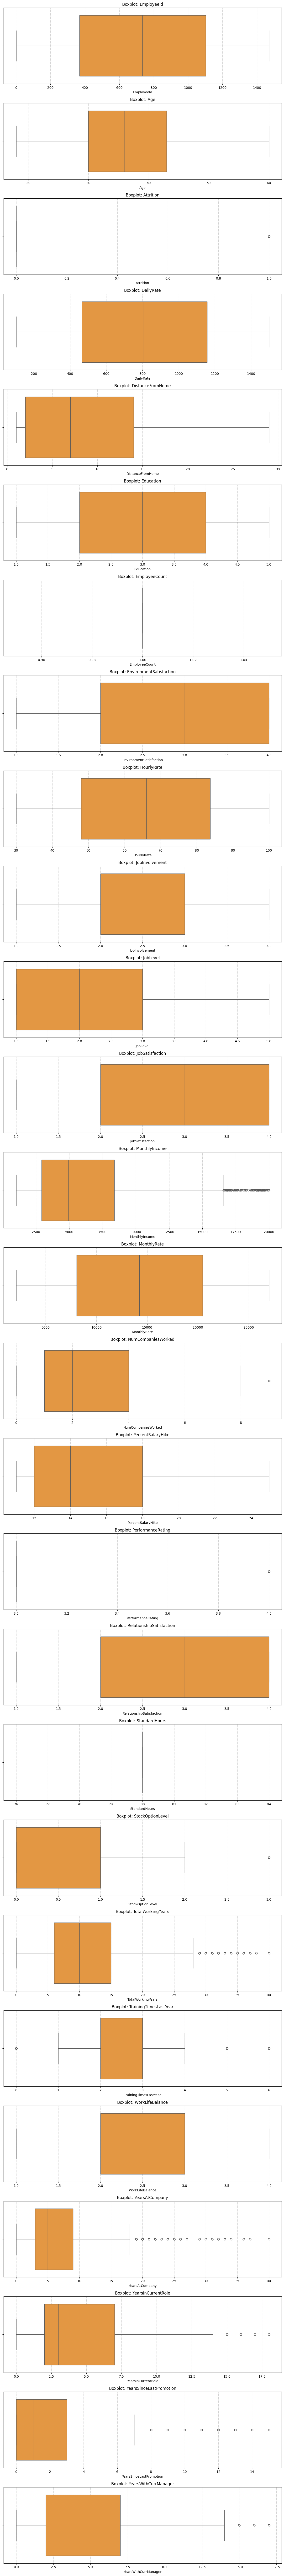

In [ ]:
plot_numeric_boxplots(df_employee)

## **3. Exploratory Data Analysis**

In [ ]:
df_employee_eda = df_employee.copy()

In [ ]:
df_employee_eda.select_dtypes(include='object').columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [ ]:
df_employee_eda.select_dtypes(include=['int', 'float']).columns

Index(['EmployeeId', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df_employee_eda.select_dtypes(include='float').columns

Index(['Attrition'], dtype='object')

In [ ]:
# Daftar kolom sesuai kategori
pure_numerical_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

In [ ]:
df_employee_eda['Attrition'] = df_employee_eda['Attrition'].apply(lambda x: 'Resign' if x == 1 else 'Tidak Resign')

### **3.1. Univariate Analysis**

In [ ]:
def plot_kategori(df, feature, warna='purple'):
    """
    Menampilkan jumlah dan persentase kategori serta plot batang dari suatu kolom kategorikal.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    feature (str): Nama kolom kategorikal.
    warna (str): Warna untuk bar chart (default = 'orange').
    """
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    df_summary = pd.DataFrame({
        'Jumlah Sampel': count,
        'Persentase (%)': percent.round(1)
    })

    print(f"\nRingkasan untuk kolom: {feature}")
    print(df_summary)
    print("\n")

    print("Visualisasi:")
    count.plot(kind='bar', title=feature, color=warna)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_histogram_semua_kolom(df, bins=50, figsize=(12, 25), color='purple'):
    """
    Menampilkan histogram dari semua kolom numerik di dalam dataframe menggunakan seaborn.histplot.

    Parameters:
    df (DataFrame): DataFrame yang akan diplot.
    bins (int): Jumlah bin pada histogram.
    figsize (tuple): Ukuran figure.
    color (str): Warna histogram.
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 2) // 3  # 3 kolom per baris

    plt.figure(figsize=figsize)
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, 3, i)
        sns.histplot(df[col], bins=bins, kde=True, color=color)
        plt.title(f'Histogram: {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        plt.tight_layout()
    plt.show()

In [ ]:
def plot_histogram(df, x, hue='Attrition', bins=20, group_by=None, group_value=None):
    """
    Menampilkan histogram variabel numerik dengan pewarnaan berdasarkan kategori hue.
    Juga menampilkan ringkasan frekuensi, persentase, dan statistik deskriptif (describe) berdasarkan hue.

    Parameters:
    df (DataFrame): DataFrame yang berisi data
    x (str): Nama kolom numerik yang ingin diplot di sumbu x
    hue (str): Nama kolom kategori untuk membedakan warna (default: 'Attrition')
    bins (int): Jumlah bin untuk histogram (default: 20)
    group_by (str, optional): Kolom kategori untuk menyaring data (misalnya 'Gender')
    group_value (str, optional): Nilai spesifik dari kolom group_by untuk difilter (misalnya 'Male')
    """

    # Filter data jika group_by dan group_value diberikan
    if group_by and group_value:
        df = df[df[group_by] == group_value]

    # Ringkasan frekuensi dan persentase
    summary = df[hue].value_counts().to_frame(name='Jumlah Sampel')
    summary['Persentase (%)'] = round(summary['Jumlah Sampel'] / summary['Jumlah Sampel'].sum() * 100, 1)

    if group_by and group_value:
        print(f"\nRingkasan Kategorikal untuk {group_by} = {group_value}")
    else:
        print("\nRingkasan Kategorikal (tanpa filter tambahan)")
    print(summary)

    # Ringkasan statistik deskriptif numerik berdasarkan hue
    print(f"\nRingkasan Statistik '{x}' berdasarkan '{hue}':")
    print(df.groupby(hue)[x].describe().round(2))
    print("\n")

    print("Visualisasi:")
    # Plot histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=x, hue=hue, multiple='stack', kde=True, bins=bins)
    title = f'{hue} vs {x}'
    if group_by and group_value:
        title += f' (Filtered: {group_by} = {group_value})'
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_pie_chart(df, x, hue):
    """
    Menampilkan ringkasan dan visualisasi pie chart berdasarkan nilai unik dari kolom x,
    dengan distribusi kategori berdasarkan kolom hue.

    Parameters:
    df (DataFrame): Dataset
    x (str): Kolom kategorikal utama (misalnya Gender, Department, dsb)
    hue (str): Kolom kategorikal kedua untuk dibandingkan (misalnya Attrition)
    """
    unique_vals = df[x].unique()
    n = len(unique_vals)
    rows = (n + 2) // 3  # Maksimum 3 pie chart per baris

    for val in unique_vals:
        subset = df[df[x] == val]
        counts = subset[hue].value_counts().sort_index()
        total = counts.sum()
        percentages = (counts / total * 100).round(1)

        # Tampilkan ringkasan tabel
        summary_df = pd.DataFrame({
            'Jumlah Sampel': counts,
            'Persentase (%)': percentages
        })
        print(f"\nRingkasan untuk {x} = {val}")
        print(summary_df)

    print("\nVisualisasi:")

    # Pie chart
    plt.figure(figsize=(16, 5 * rows))
    for i, val in enumerate(unique_vals, 1):
        subset = df[df[x] == val]
        counts = subset[hue].value_counts().sort_index()
        percentages = (counts / counts.sum() * 100).round(1)

        plt.subplot(rows, 3, i)
        plt.pie(counts, labels=[f"{idx} ({p}%)" for idx, p in percentages.items()],
                autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribusi {x} - {val} berdasarkan {hue}')

    plt.tight_layout()
    plt.show()

#### a. Analisis Distribusi Attrition

Sebagai perusahaan multinasional yang telah berdiri sejak tahun 2000 dan memiliki lebih dari 1000 karyawan, Jaya Jaya Maju kini menghadapi tantangan serius dalam hal retensi karyawan. Salah satu indikator utama permasalahan ini adalah `tingkat attrition (resign) yang mencapai 12.2%`, melebihi ambang normal yang dianggap wajar (<10%). Tingginya tingkat attrition ini berpotensi menurunkan produktivitas, efisiensi operasional, serta stabilitas jangka panjang perusahaan.


Ringkasan untuk kolom: Attrition
              Jumlah Sampel  Persentase (%)
Attrition                                  
Tidak Resign           1291           87.80
Resign                  179           12.20


Visualisasi:


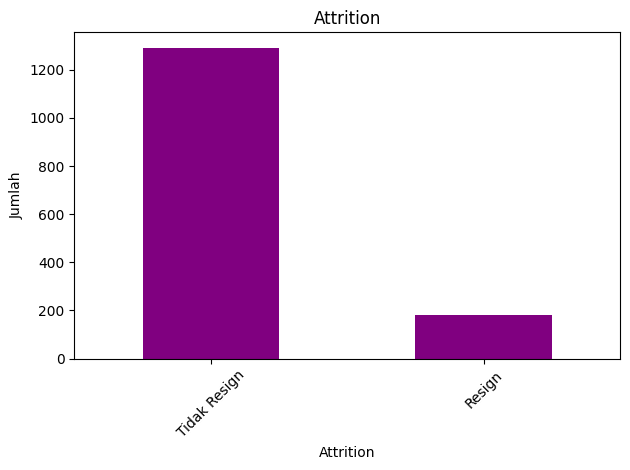

In [ ]:
plot_kategori(df_employee_eda, 'Attrition')

Berdasarkan hasil di atas, terlihat bahwa:
- Sebanyak 87.8% karyawan (1291 orang) berada dalam status `"Tidak Keluar"`, yang berarti mereka masih bekerja di perusahaan.
- Sebaliknya, hanya 12.2% karyawan (179 orang) yang mengalami `Attrition atau keluar dari perusahaan`.

Distribusi ini menunjukkan `adanya ketimpangan kelas (class imbalance)` dalam data, di mana proporsi antara karyawan yang keluar dan tidak keluar cukup jomplang. Dalam konteks analisis prediktif, kondisi ini perlu diperhatikan karena model machine learning cenderung bias terhadap kelas mayoritas. Selain itu, meskipun hanya sebagian kecil karyawan yang keluar, `attrition` bisa menjadi sinyal penting yang berkaitan dengan isu retensi, kepuasan kerja, dan budaya organisasi yang perlu ditindaklanjuti oleh perusahaan.

#### b. Distribusi Semua Fitur Numerik

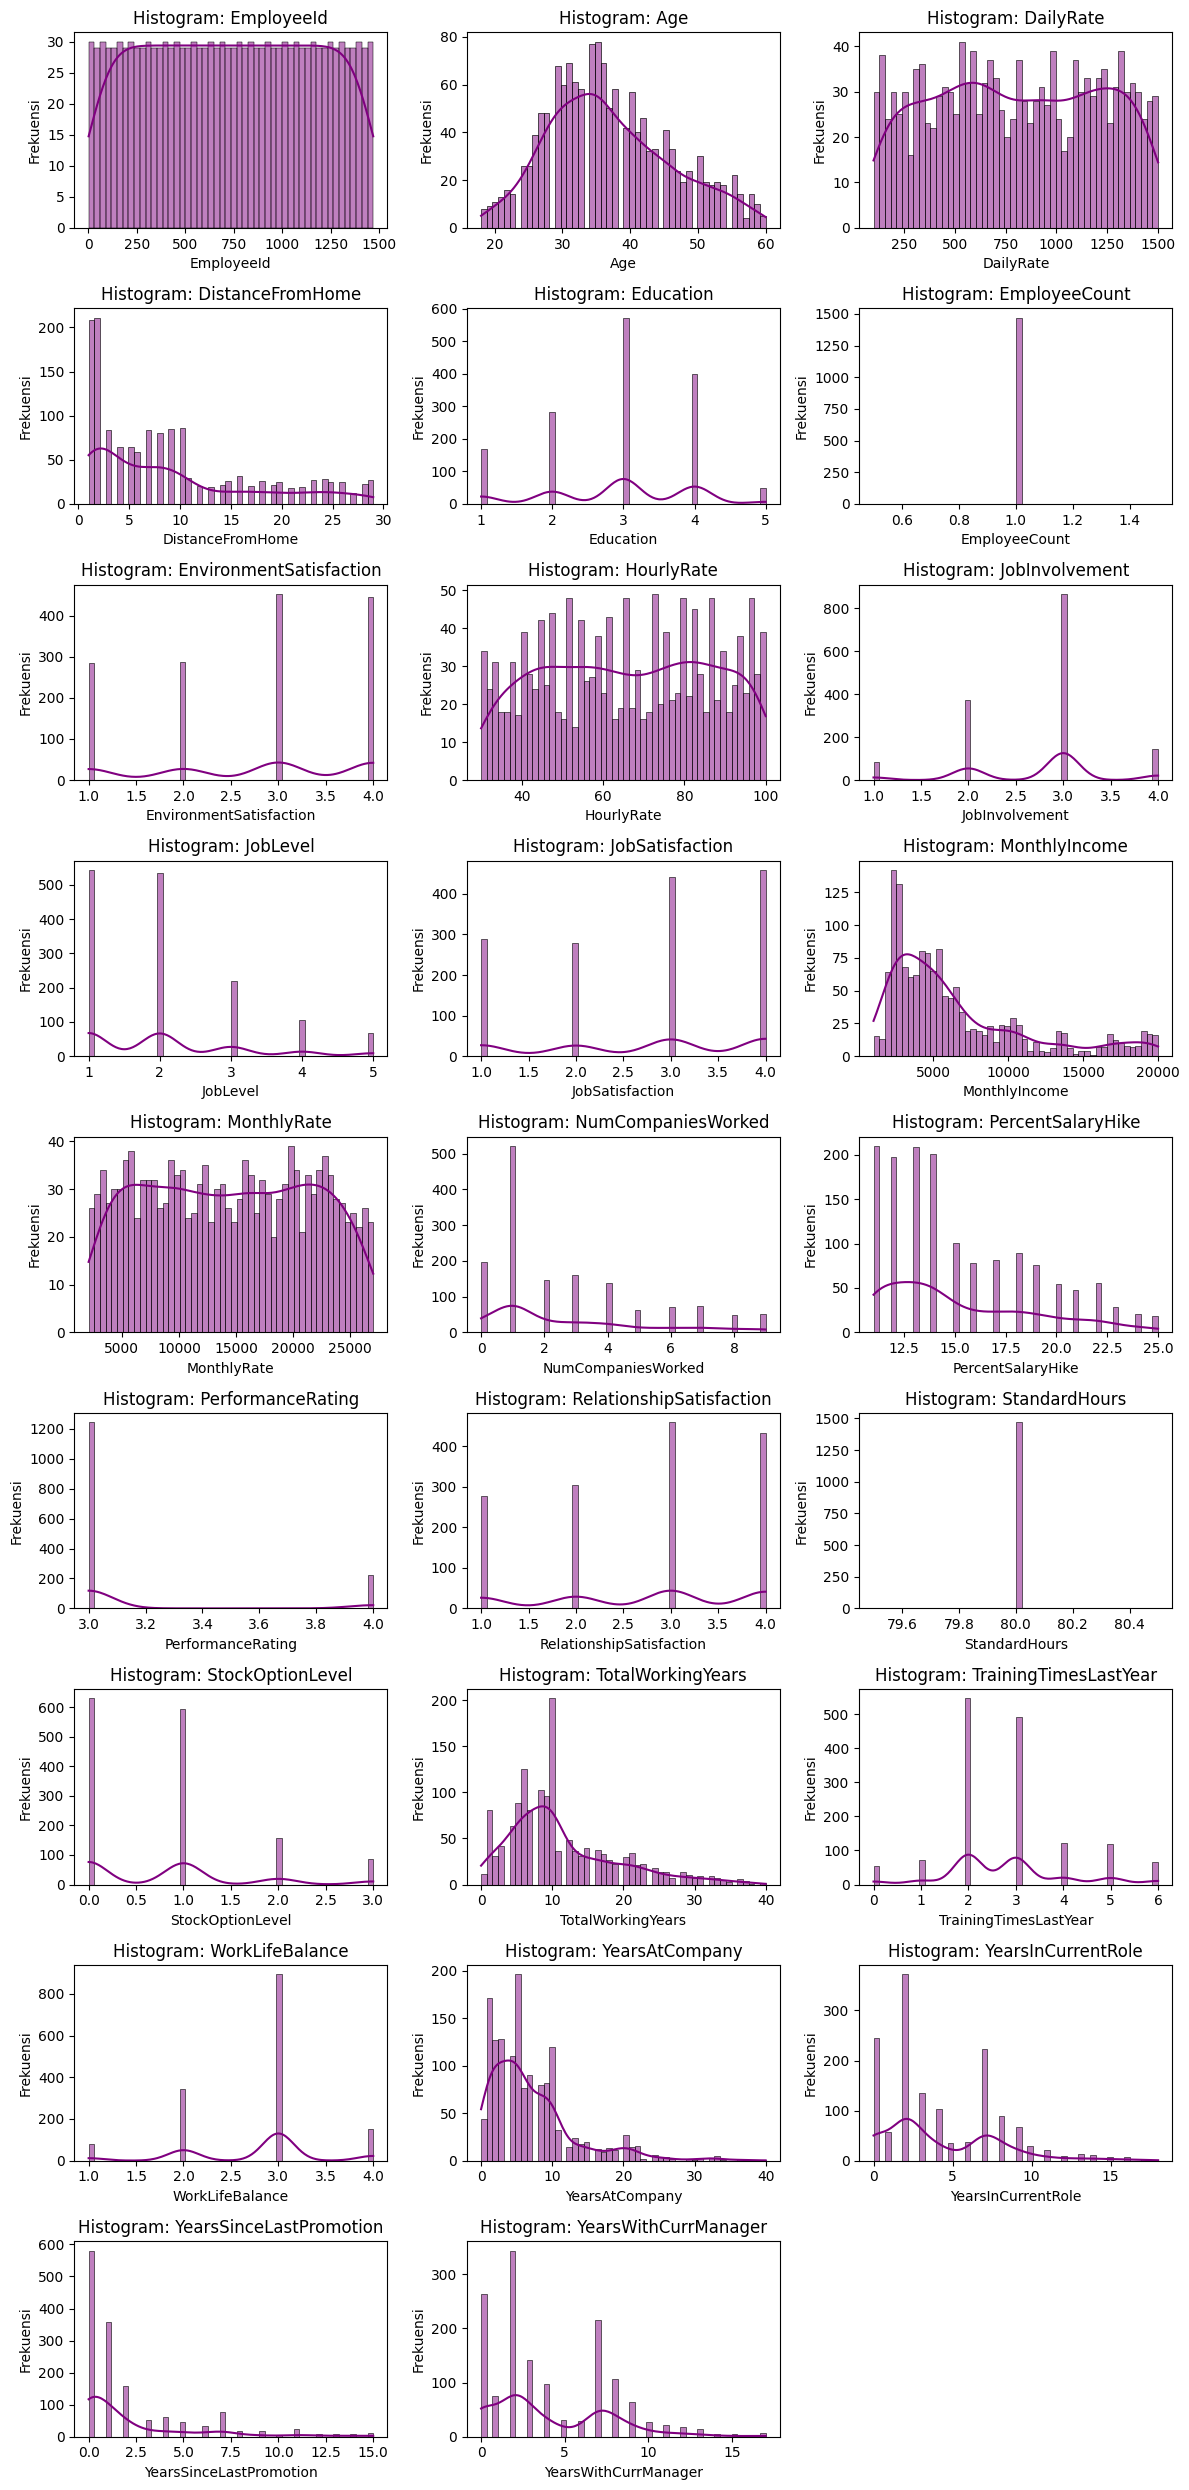

In [ ]:
plot_histogram_semua_kolom(df_employee_eda)

### 3.1.2. Bivariate Analysis

Menjelajahi hubungan antara fitur-fitur tertentu terhadap Attrition.

In [ ]:
def plot_kategori_bivariate(df, x, hue='Attrition', colors=None):
    """
    Menampilkan jumlah dan persentase kategori serta stacked bar chart dengan hue dari suatu kolom kategorikal.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    x (str): Nama kolom kategorikal utama.
    hue (str): Nama kolom kategorikal kedua (default = 'Attrition').
    colors (list): Daftar warna untuk setiap kategori hue.
    """
    # Crosstab
    crosstab = pd.crosstab(df[x], df[hue])
    percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

    # Tampilkan ringkasan
    print(f"\nRingkasan untuk kolom: {x}")
    summary_df = pd.concat([
        crosstab.rename(columns=lambda val: f"Jumlah {hue}={val}"),
        percent.rename(columns=lambda val: f"Persentase {hue}={val} (%)").round(1)
    ], axis=1)
    print(summary_df)

    print("\nVisualisasi:")

    # Plot stacked bar chart
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
    plt.title(f"Distribusi {x} berdasarkan {hue}")
    plt.ylabel("Jumlah")
    plt.xlabel(x)
    plt.xticks(rotation=45)
    plt.legend(title=hue)
    plt.tight_layout()
    plt.show()

#### a. Analisis Demografis

##### -- **UMUR (Age)**

Untuk mengetahui apakah `usia (Age)` memiliki hubungan dengan kecenderungan karyawan untuk `keluar dari perusahaan (Attrition)`, kita dapat menggunakan visualisasi `histogram` yang dipisahkan berdasarkan kategori `attrition (keluar atau tidak)`. Histogram ini akan menunjukkan distribusi usia dalam masing-masing kelompok dan membantu kita melihat `apakah ada perbedaan pola usia antara karyawan yang keluar dan yang tetap bekerja`.


Ringkasan Kategorikal (tanpa filter tambahan)
              Jumlah Sampel  Persentase (%)
Attrition                                  
Tidak Resign           1291           87.80
Resign                  179           12.20

Ringkasan Statistik 'Age' berdasarkan 'Attrition':
               count  mean  std   min   25%   50%   75%   max
Attrition                                                    
Resign        179.00 33.47 9.83 18.00 26.00 31.00 39.00 58.00
Tidak Resign 1291.00 37.40 8.93 18.00 31.00 36.00 43.00 60.00


Visualisasi:


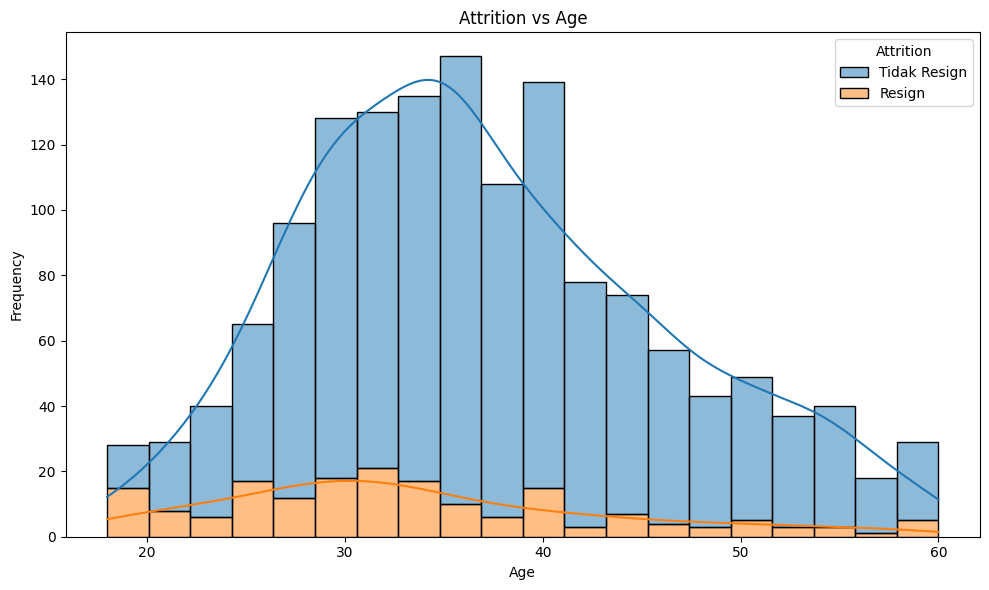

In [ ]:
plot_histogram(df_employee_eda, x='Age', hue='Attrition')

Dari hasil visualisasi dan ringkasan statistik di atas, kita bisa menarik beberapa kesimpulan penting:
- Rata-rata `usia karyawan yang keluar (resign)` adalah `lebih muda`, yaitu 33.47 tahun, dibandingkan yang bertahan, yaitu 37.40 tahun.
- `Kelompok usia 25–39 tahun` mendominasi proporsi karyawan yang keluar, dengan median usia 31 tahun. Sementara itu, karyawan yang bertahan cenderung berada pada usia di atas 35 tahun.
- Hal ini menunjukkan bahwa `karyawan yang lebih muda` cenderung memiliki `kemungkinan lebih tinggi untuk keluar dari perusahaan` dibandingkan karyawan yang lebih tua.

**Insight:**
Perusahaan mungkin perlu memfokuskan perhatian lebih pada kelompok usia muda, misalnya melalui program pengembangan karier, pelatihan, atau insentif untuk meningkatkan retensi. Faktor seperti ekspektasi karier, fleksibilitas, atau kepuasan awal dalam pekerjaan bisa menjadi alasan utama attrition pada kelompok usia ini.

##### -- **JENIS KELAMIN (Gender)**

Untuk mengetahui apakah `jenis kelamin (Gender)` berpengaruh terhadap tingkat attrition atau pengunduran diri karyawan, kita dapat membuat visualisasi berupa `pie chart` yang memperlihatkan proporsi karyawan yang keluar dan tetap, terpisah untuk laki-laki (Male) dan perempuan (Female).

Visualisasi ini membantu memahami apakah salah satu gender memiliki kecenderungan lebih tinggi dalam melakukan attrition.


Ringkasan untuk Gender = Male
              Jumlah Sampel  Persentase (%)
Attrition                                  
Resign                  108           12.20
Tidak Resign            774           87.80

Ringkasan untuk Gender = Female
              Jumlah Sampel  Persentase (%)
Attrition                                  
Resign                   71           12.10
Tidak Resign            517           87.90

Visualisasi:


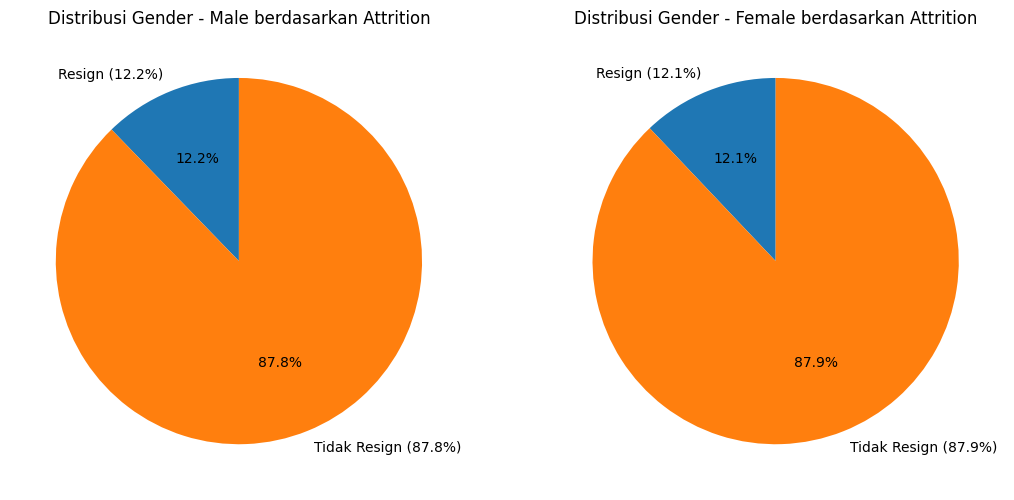

In [ ]:
plot_pie_chart(df_employee_eda, x='Gender', hue='Attrition')

Berdasarkan ringkasan dan visualisasi `pie chart`, terlihat bahwa tingkat attrition antara karyawan laki-laki dan perempuan hampir sama, yaitu sekitar `12.2%` untuk `laki-laki` dan `12.1%` untuk `perempuan`. Ini menunjukkan bahwa `jenis kelamin bukan merupakan faktor signifikan` untuk menjadikan `gender` sebagai faktor dominan dalam keputusan resign.

**Insight:** Tingkat kepergian karyawan cenderung merata antar `gender`, sehingga program retensi karyawan tidak perlu difokuskan secara berbeda untuk laki-laki dan perempuan.

##### -- **STATUS PERNIKAHAN (MaritalStatus)**

Untuk mengevaluasi apakah `status pernikahan karyawan` memiliki pengaruh terhadap kemungkinan mereka `keluar dari perusahaan (attrition)`, kita akan menggunakan visualisasi `pie chart` berdasarkan nilai dari kolom `MaritalStatus` dan `Attrition`.

Visualisasi ini akan membantu kita membandingkan persentase karyawan yang keluar vs. tetap bekerja berdasarkan status mereka sebagai `menikah (Married)`, `lajang (Single)`, atau `cerai (Divorced)`.


Ringkasan untuk MaritalStatus = Married
              Jumlah Sampel  Persentase (%)
Attrition                                  
Resign                   62            9.20
Tidak Resign            611           90.80

Ringkasan untuk MaritalStatus = Single
              Jumlah Sampel  Persentase (%)
Attrition                                  
Resign                   94           20.00
Tidak Resign            376           80.00

Ringkasan untuk MaritalStatus = Divorced
              Jumlah Sampel  Persentase (%)
Attrition                                  
Resign                   23            7.00
Tidak Resign            304           93.00

Visualisasi:


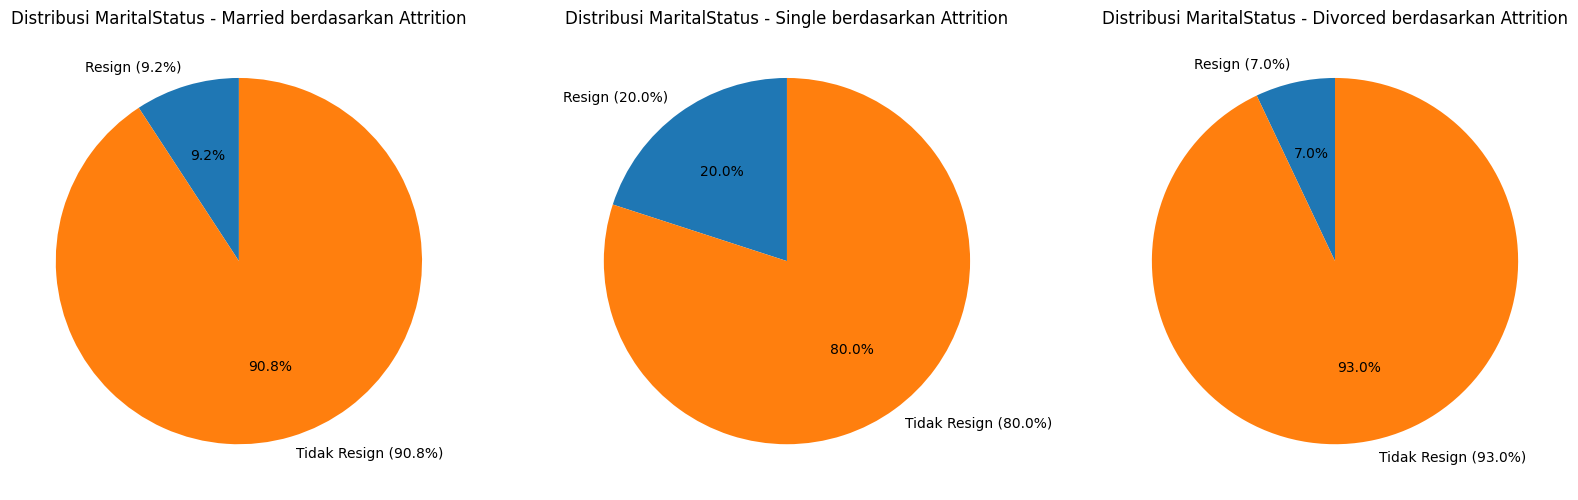

In [ ]:
plot_pie_chart(df_employee_eda, x='MaritalStatus', hue='Attrition')

Hasil analisis menunjukkan bahwa `status pernikahan` memiliki hubungan yang cukup mencolok dengan tingkat `attrition`:

- Karyawan `lajang (Single)` memiliki tingkat `attrition tertinggi` yaitu `20%`, jauh di atas dua kelompok lainnya.
- Karyawan `menikah (Married)` memiliki tingkat `attrition yang lebih rendah`, yaitu `9.20%`.
- Karyawan `bercerai (Divorced)` memiliki tingkat `attrition terendah` yaitu `7%`.

Temuan ini mengindikasikan bahwa `karyawan lajang lebih rentan untuk resign dari perusahaan` dibandingkan dengan yang sudah menikah atau bercerai. Hal ini bisa disebabkan oleh fleksibilitas yang lebih besar dalam mengambil keputusan karier, mobilitas yang tinggi, atau pencarian peluang yang lebih baik.

**Insight:** Strategi retensi karyawan bisa mempertimbangkan faktor status pernikahan, khususnya dengan memberi perhatian lebih kepada karyawan lajang yang mungkin membutuhkan motivasi atau insentif tambahan untuk tetap bertahan di perusahaan.










##### -- **TINGKAT PENDIDIKAN (Education)**

Untuk memahami hubungan antara `tingkat pendidikan karyawan` dan kemungkinan mereka `keluar dari perusahaan (Attrition)`, dilakukan visualisasi terhadap variabel `Education`.

Variabel ini bersifat ordinal dan dikodekan sebagai berikut:
- 1 = SMA/SMK
- 2 = Diploma (D3/D4)
- 3 = Sarjana (S1)
- 4 = Magister (S2)
- 5 = Doktor (S3)

Dengan visualisasi ini, kita dapat melihat apakah terdapat pola tertentu antara tingkat pendidikan dan tingkat attrition karyawan.


Ringkasan untuk kolom: Education
Attrition  Jumlah Attrition=Resign  Jumlah Attrition=Tidak Resign  \
Education                                                           
1                               26                            144   
2                               31                            251   
3                               76                            496   
4                               44                            354   
5                                2                             46   

Attrition  Persentase Attrition=Resign (%)  \
Education                                    
1                                    15.30   
2                                    11.00   
3                                    13.30   
4                                    11.10   
5                                     4.20   

Attrition  Persentase Attrition=Tidak Resign (%)  
Education                                         
1                                          84.70  
2     

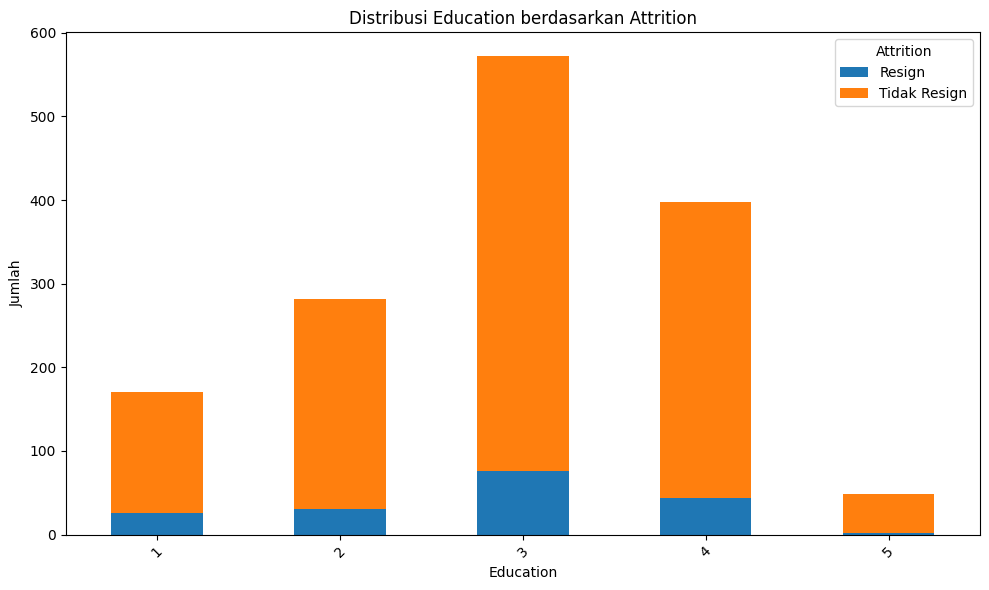

In [ ]:
plot_kategori_bivariate(df_employee_eda, x='Education', hue='Attrition')

Berdasarkan hasil visualisasi dan ringkasan statistik, dapat disimpulkan bahwa:
- Karyawan dengan pendidikan `SMA/SMK (kategori 1)` memiliki tingkat `attrition tertinggi`, yakni 15.3%.
- Sarjana (S1) juga memiliki tingkat `attrition yang relatif tinggi` (13.3%), bahkan sedikit lebih tinggi dibandingkan Diploma dan Magister.
- Karyawan bergelar `Doktor (S3)` menunjukkan tingkat `attrition terendah`, yaitu hanya 4.2%, menunjukkan kestabilan yang lebih tinggi dalam pekerjaan dan bertahan lebih lama di perusahaan.
- Meskipun tidak selalu konsisten menurun pada setiap level, secara umum terlihat bahwa karyawan dengan `pendidikan lebih tinggi` cenderung memiliki tingkat `attrition yang lebih rendah`.

**Insight:** Karyawan dengan `pendidikan rendah (SMA/SMK dan S1)` bisa menjadi target prioritas untuk program retensi, karena kelompok ini menunjukkan tingkat pengunduran diri yang lebih tinggi.

##### -- **BIDANG STUDI (EducationField)**


Ringkasan untuk kolom: EducationField
Attrition         Jumlah Attrition=Resign  Jumlah Attrition=Tidak Resign  \
EducationField                                                             
Human Resources                         2                             25   
Life Sciences                          70                            536   
Marketing                              26                            133   
Medical                                46                            418   
Other                                  10                             72   
Technical Degree                       25                            107   

Attrition         Persentase Attrition=Resign (%)  \
EducationField                                      
Human Resources                              7.40   
Life Sciences                               11.60   
Marketing                                   16.40   
Medical                                      9.90   
Other                             

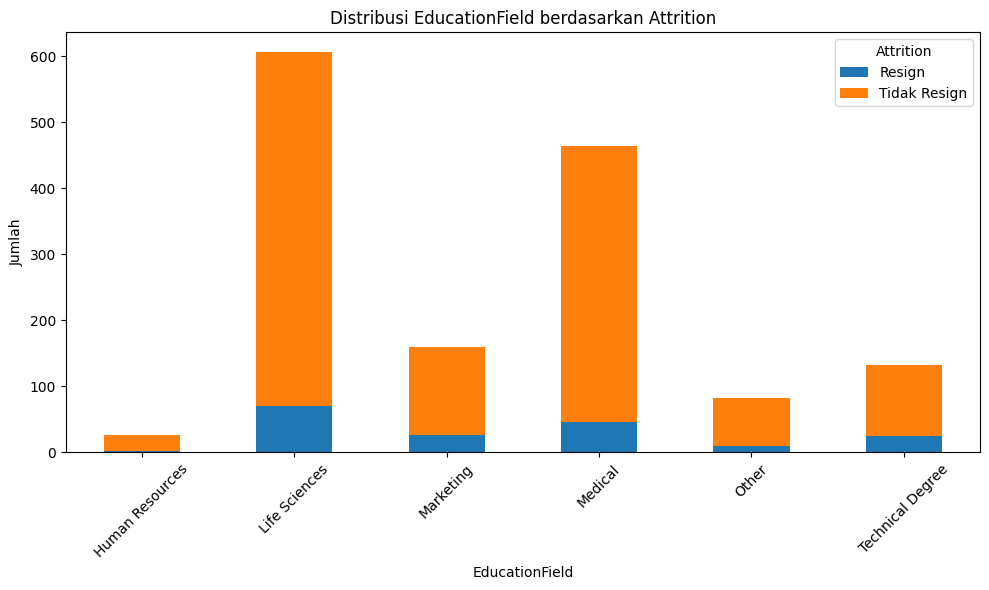

In [ ]:
plot_kategori_bivariate(df_employee_eda, x='EducationField', hue='Attrition')

#### b. Analisis Karakteristik Pekerjaan

##### Departemen kerja (Department)

Untuk memahami apakah `departemen tempat karyawan bekerja` memiliki hubungan dengan kecenderungan mereka untuk `mengundurkan diri (attrition)`, kita akan membuat analisis bivariate menggunakan fungsi `plot_kategori_bivariate`.

Visualisasi ini akan memperlihatkan jumlah dan persentase karyawan yang keluar dan tetap di perusahaan berdasarkan setiap kategori dalam kolom Department.


Ringkasan untuk kolom: Department
Attrition               Jumlah Attrition=Resign  \
Department                                        
Human Resources                               6   
Research & Development                      107   
Sales                                        66   

Attrition               Jumlah Attrition=Tidak Resign  \
Department                                              
Human Resources                                    57   
Research & Development                            854   
Sales                                             380   

Attrition               Persentase Attrition=Resign (%)  \
Department                                                
Human Resources                                    9.50   
Research & Development                            11.10   
Sales                                             14.80   

Attrition               Persentase Attrition=Tidak Resign (%)  
Department                                                     

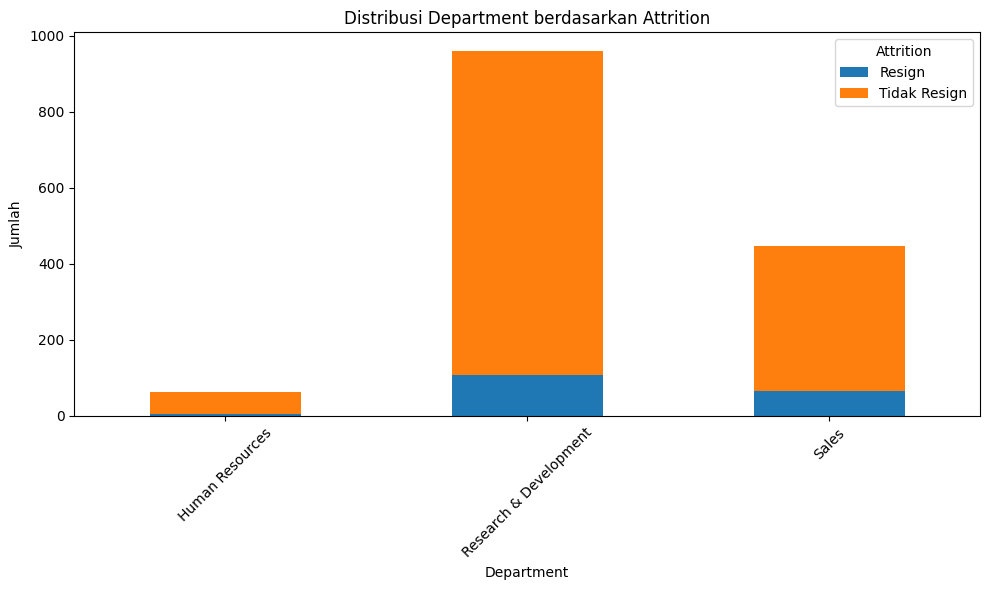

In [ ]:
plot_kategori_bivariate(df_employee_eda, x='Department', hue='Attrition')

Hasil analisis menunjukkan adanya perbedaan tingkat attrition antar departemen:
- Departemen `Sales` mencatat tingkat `attrition tertinggi` yaitu 14.8%, yang menunjukkan bahwa hampir 1 dari 7 karyawan di departemen ini memilih keluar dari perusahaan.
- Departemen `Human Resources (HR)` memiliki tingkat `attrition` sebesar 11.1%, `sedikit lebih tinggi` dibandingkan Research & Development (R&D) yang berada di angka 9.5%.
- Departemen `R&D`, meskipun memiliki `jumlah karyawan terbesar`, menunjukkan `tingkat retensi yang relatif lebih baik` dibandingkan Sales.

**Insight:** Temuan ini dapat menjadi dasar bagi manajemen untuk menyelidiki lebih lanjut kondisi kerja, kepuasan, atau tantangan spesifik yang dihadapi oleh karyawan di departemen tertentu, terutama di bagian `Sales`, yang tampaknya `lebih rentan terhadap turnover`. Pendekatan yang lebih terfokus untuk `retensi karyawan dapat difokuskan pada departemen dengan tingkat attrition yang tinggi`.

##### Jabatan karyawan (JobRole)

Untuk mengetahui apakah `peran pekerjaan (JobRole)` berpengaruh terhadap `attrition (pengunduran diri)` karyawan, kita akan menganalisis distribusi jumlah karyawan yang keluar dan tetap bekerja berdasarkan `peran mereka`. Dengan menggunakan visualisasi `bivariate`, kita dapat melihat apakah ada kecenderungan tertentu pada jenis pekerjaan yang lebih sering mengalami attrition.


Ringkasan untuk kolom: JobRole
Attrition                  Jumlah Attrition=Resign  \
JobRole                                              
Healthcare Representative                        8   
Human Resources                                  6   
Laboratory Technician                           49   
Manager                                          5   
Manufacturing Director                           7   
Research Director                                2   
Research Scientist                              38   
Sales Executive                                 39   
Sales Representative                            25   

Attrition                  Jumlah Attrition=Tidak Resign  \
JobRole                                                    
Healthcare Representative                            123   
Human Resources                                       46   
Laboratory Technician                                210   
Manager                                               97   
Manufacturing

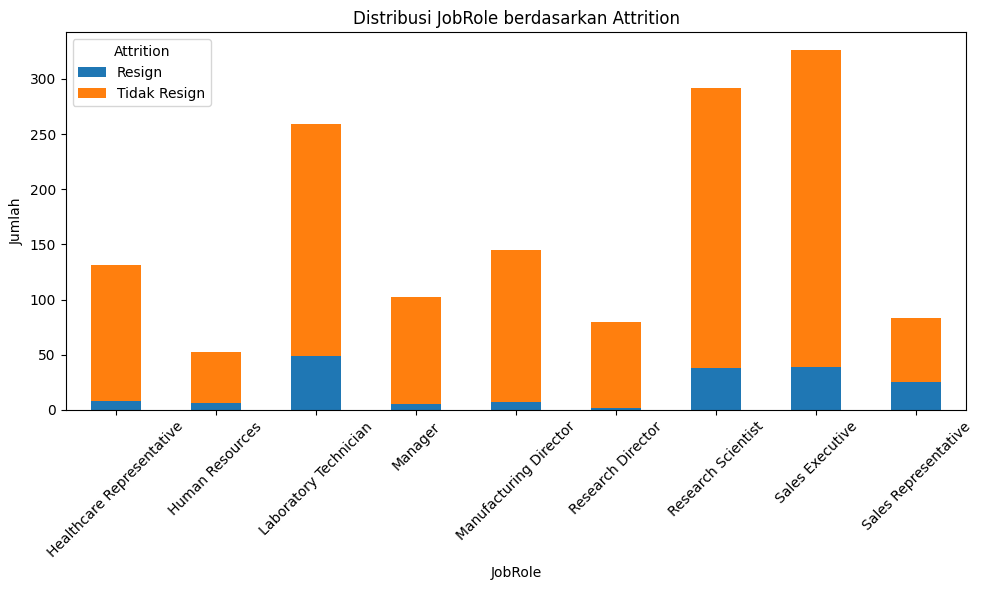

In [ ]:
plot_kategori_bivariate(df_employee_eda, x='JobRole', hue='Attrition')

Hasil analisis menunjukkan perbedaan signifikan dalam tingkat attrition berdasarkan peran pekerjaan yang dimiliki oleh karyawan:

- `Sales Representative` memiliki tingkat `attrition tertinggi`, yaitu 30.1%, yang menunjukkan bahwa `hampir sepertiga dari karyawan di peran ini keluar dari perusahaan`. Hal ini mungkin `disebabkan oleh tantangan dalam pekerjaan penjualan` atau faktor lain yang perlu dieksplorasi lebih lanjut.
- `Laboratory Technician dan Research Scientist` juga memiliki tingkat `attrition yang cukup tinggi`, yaitu 18.9% dan 13.0%. Ini menunjukkan bahwa beberapa `peran teknis dan penelitian mengalami tingkat turnover yang lebih besar` dibandingkan peran manajerial.
- Sebaliknya, `Research Director, Manufacturing Director, dan Manager` memiliki tingkat `attrition yang sangat rendah`, yakni di bawah 5%, yang menunjukkan bahwa karyawan di peran-peran ini lebih stabil dalam perusahaan.

**Insight:** Perusahaan bisa mengidentifikasi peran yang mungkin memerlukan perhatian khusus dalam hal retensi karyawan, seperti `Sales Representative`, atau `menyelidiki alasan tingginya tingkat attrition pada peran teknis atau penelitian tertentu`.

##### Frekuensi perjalanan dinas (BusinessTravel)

`Perjalanan dinas (Business Travel)` dapat menjadi faktor yang memengaruhi kepuasan dan loyalitas karyawan. Karyawan yang sering melakukan perjalanan mungkin mengalami kelelahan, kurangnya waktu bersama keluarga, atau tekanan kerja yang lebih tinggi. Untuk mengeksplorasi apakah frekuensi perjalanan dinas berkaitan dengan attrition, kita akan menggunakan visualisasi `barplot bivariate` berdasarkan kategori `BusinessTravel` dan hue `Attrition`.


Ringkasan untuk kolom: BusinessTravel
Attrition          Jumlah Attrition=Resign  Jumlah Attrition=Tidak Resign  \
BusinessTravel                                                              
Non-Travel                              11                            139   
Travel_Frequently                       51                            226   
Travel_Rarely                          117                            926   

Attrition          Persentase Attrition=Resign (%)  \
BusinessTravel                                       
Non-Travel                                    7.30   
Travel_Frequently                            18.40   
Travel_Rarely                                11.20   

Attrition          Persentase Attrition=Tidak Resign (%)  
BusinessTravel                                            
Non-Travel                                         92.70  
Travel_Frequently                                  81.60  
Travel_Rarely                                      88.80  

Visualis

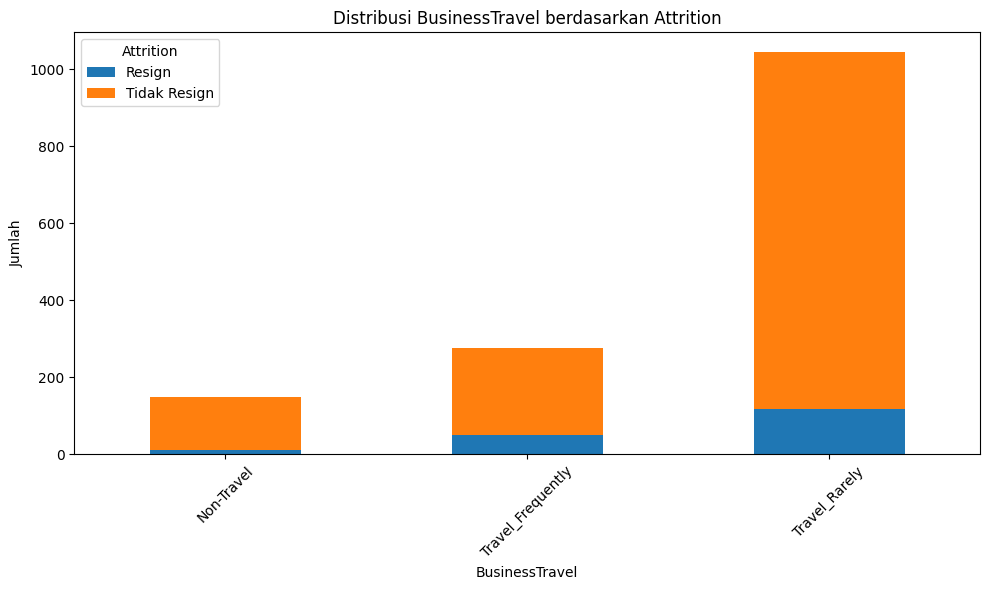

In [ ]:
plot_kategori_bivariate(df_employee_eda, x='BusinessTravel', hue='Attrition')

Hasil visualisasi dan ringkasan menunjukkan adanya perbedaan signifikan dalam tingkat attrition berdasarkan frekuensi perjalanan dinas:
- Karyawan yang `sering bepergian (Travel_Frequently)` memiliki tingkat `attrition tertinggi`, yaitu 18.4%. Ini menunjukkan bahwa `seringnya bepergian dapat menjadi salah satu pemicu keinginan untuk keluar dari perusahaan`.
- Karyawan yang `jarang bepergian (Travel_Rarely)` memiliki tingkat `attrition` sebesar 11.2%, `lebih rendah` dibandingkan mereka yang sering bepergian, tetapi masih cukup signifikan.
- Menariknya, karyawan yang `tidak pernah bepergian (Non-Travel)` memiliki tingkat `attrition paling rendah`, yaitu hanya 7.3%.

**Insight:** Temuan ini mengindikasikan bahwa `frekuensi perjalanan dinas berhubungan positif dengan kemungkinan attrition`. Oleh karena itu, perusahaan perlu mempertimbangkan keseimbangan kerja dan perjalanan serta menyediakan dukungan tambahan bagi karyawan yang sering bepergian guna meningkatkan retensi.

##### Waktu Lembur (OverTime)

`Waktu lembur yang berlebihan` sering dikaitkan dengan kelelahan kerja, stres, dan ketidakseimbangan kehidupan kerja. Hal ini dapat berdampak langsung pada kepuasan kerja dan keputusan karyawan untuk tetap bertahan atau mengundurkan diri dari perusahaan. Untuk memahami lebih dalam hubungan antara lembur (OverTime) dan attrition, kita akan memvisualisasikannya dalam bentuk `pie chart` yang dibedakan berdasarkan `status attrition`.


Ringkasan untuk OverTime = Yes
              Jumlah Sampel  Persentase (%)
Attrition                                  
Resign                   98           23.60
Tidak Resign            318           76.40

Ringkasan untuk OverTime = No
              Jumlah Sampel  Persentase (%)
Attrition                                  
Resign                   81            7.70
Tidak Resign            973           92.30

Visualisasi:


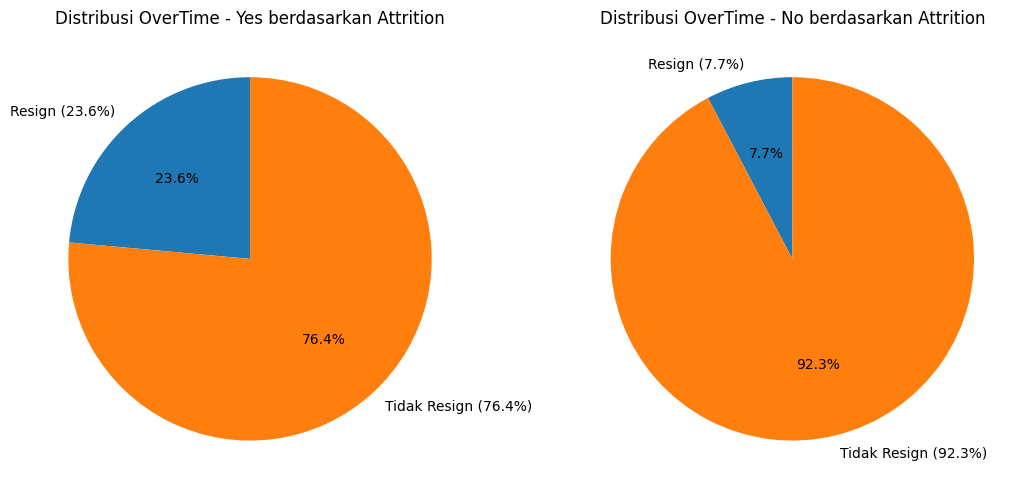

In [ ]:
plot_pie_chart(df_employee_eda, x='OverTime', hue='Attrition')

Hasil visualisasi menunjukkan bahwa karyawan yang lembur memiliki kemungkinan lebih tinggi untuk mengundurkan diri dibandingkan yang tidak lembur:
- Karyawan dengan `lembur (OverTime = Yes)` menunjukkan tingkat `attrition yang cukup tinggi` yaitu 23.6%.
- Sebaliknya, karyawan yang `tidak lembur (OverTime = No)` hanya memiliki `tingkat attrition sebesar 7.7%`.

**Insight:** Temuan ini menegaskan bahwa `lembur berpotensi meningkatkan risiko pengunduran diri`, kemungkinan karena faktor kelelahan, tekanan kerja, atau kurangnya waktu pribadi. Oleh karena itu, perusahaan disarankan untuk memantau beban kerja dan frekuensi lembur karyawan serta menyediakan dukungan atau kompensasi yang memadai untuk menjaga keseimbangan kerja dan kehidupan pribadi serta mengurangi tingkat attrition.

#### c. Analisis Kepuasan dan Keterlibatan

##### EnvironmentSatisfaction

##### JobSatisfaction

`Kepuasan kerja (Job Satisfaction)` merupakan faktor penting dalam menentukan retensi karyawan. Karyawan yang merasa puas dengan pekerjaan mereka cenderung lebih setia dan tidak mudah meninggalkan perusahaan. Untuk memahami bagaimana tingkat kepuasan kerja memengaruhi tingkat pengunduran diri, kita akan memvisualisasikan hubungan antara JobSatisfaction dan Attrition menggunakan `bar chart bivariate`.


Ringkasan untuk kolom: JobSatisfaction
Attrition        Jumlah Attrition=Resign  Jumlah Attrition=Tidak Resign  \
JobSatisfaction                                                           
1                                     46                            243   
2                                     32                            248   
3                                     62                            380   
4                                     39                            420   

Attrition        Persentase Attrition=Resign (%)  \
JobSatisfaction                                    
1                                          15.90   
2                                          11.40   
3                                          14.00   
4                                           8.50   

Attrition        Persentase Attrition=Tidak Resign (%)  
JobSatisfaction                                         
1                                                84.10  
2                        

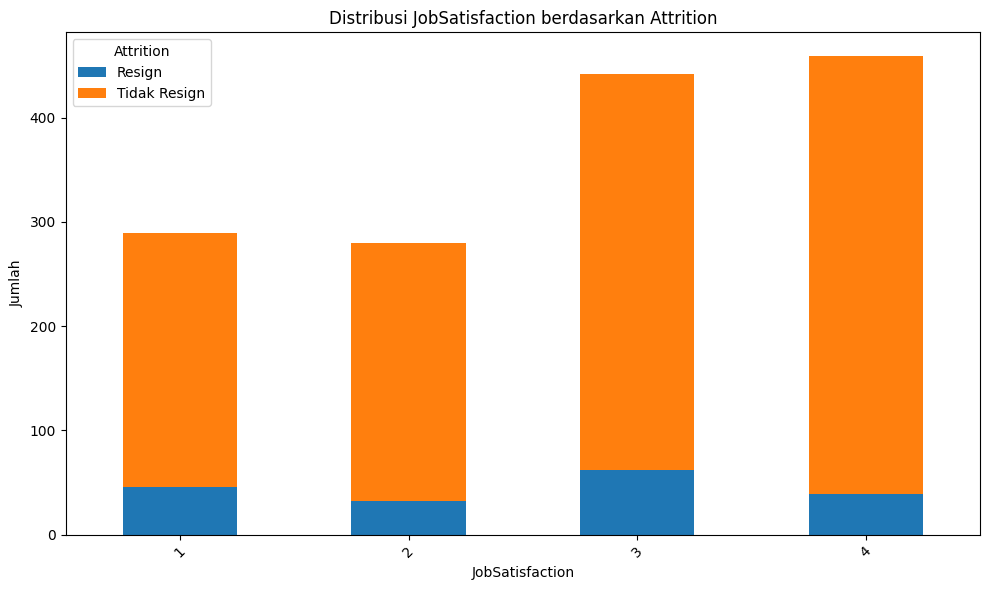

In [ ]:
plot_kategori_bivariate(df_employee_eda, x='JobSatisfaction', hue='Attrition')

Hasil analisis menunjukkan bahwa semakin tinggi tingkat kepuasan kerja, semakin rendah tingkat pengunduran diri (attrition):
- Karyawan dengan `JobSatisfaction = 1 (Very Low)` memiliki `tingkat attrition sebesar 15.9%`, menunjukkan bahwa ketidakpuasan kerja secara signifikan `berkontribusi terhadap keputusan untuk keluar` dari perusahaan.
- Tingkat `attrition secara umum menurun seiring meningkatnya kepuasan kerja`, dengan `JobSatisfaction = 4 (High)` hanya memiliki tingkat attrition sebesar 8.5%.
- Menariknya, `JobSatisfaction = 3 (Medium)` memiliki `tingkat attrition yang sedikit lebih tinggi dibandingkan level 2`, yaitu 14.0%, yang dapat menjadi indikasi bahwa `persepsi subjektif terhadap kepuasan kerja juga dipengaruhi oleh faktor eksternal lainnya`.

**Insight:** Secara keseluruhan, data ini memperkuat pentingnya menciptakan lingkungan kerja yang mendukung dan memuaskan bagi karyawan. Upaya untuk meningkatkan kepuasan kerja, seperti melalui pengakuan prestasi, kejelasan jalur karier, dan kompensasi yang adil, dapat menjadi strategi penting dalam mengurangi tingkat attrition.

##### RelationshipSatisfaction

##### Joblnvolvement

##### WorkLifeBalance

`Keseimbangan kehidupan kerja (Work-Life Balance)` merupakan salah satu faktor penting yang mempengaruhi kepuasan kerja dan keputusan karyawan untuk tetap berada dalam suatu organisasi. Karyawan yang merasa memiliki waktu yang cukup untuk kehidupan pribadi dan pekerjaan cenderung memiliki tingkat stres yang lebih rendah dan loyalitas yang lebih tinggi. Untuk mengevaluasi pengaruh WorkLifeBalance terhadap Attrition, kita akan menggunakan visualisasi `barplot bivariate`.


Ringkasan untuk kolom: WorkLifeBalance
Attrition        Jumlah Attrition=Resign  Jumlah Attrition=Tidak Resign  \
WorkLifeBalance                                                           
1                                     18                             62   
2                                     45                            299   
3                                     94                            799   
4                                     22                            131   

Attrition        Persentase Attrition=Resign (%)  \
WorkLifeBalance                                    
1                                          22.50   
2                                          13.10   
3                                          10.50   
4                                          14.40   

Attrition        Persentase Attrition=Tidak Resign (%)  
WorkLifeBalance                                         
1                                                77.50  
2                        

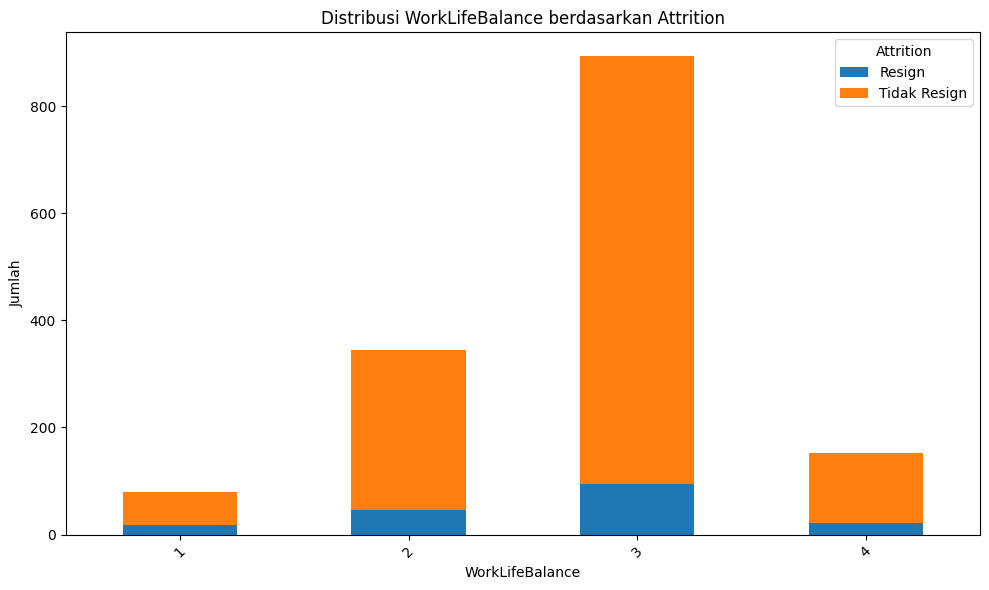

In [ ]:
plot_kategori_bivariate(df_employee_eda, x='WorkLifeBalance', hue='Attrition')

Hasil analisis menunjukkan adanya korelasi negatif antara tingkat WorkLifeBalance dan tingkat Attrition:

- Karyawan dengan `WorkLifeBalance = 1 (Poor)` memiliki tingkat `attrition tertinggi` sebesar 22.5%, menandakan bahwa `kurangnya keseimbangan antara kehidupan pribadi dan pekerjaan` berkontribusi terhadap keputusan untuk keluar dari perusahaan.
- Keseimbangan kerja yang membaik (level 2 dan 3) menunjukkan penurunan tingkat attrition, di mana `WorkLifeBalance = 3 (Good)` memiliki `attrition terendah` yaitu 10.5%.
- Menariknya, tingkat `attrition kembali sedikit naik pada level tertinggi yaitu WorkLifeBalance = 4 (Excellent)` sebesar 14.4%, yang mungkin menandakan adanya faktor lain yang juga berpengaruh seperti beban kerja, gaji, atau peluang karier.

**Insight:** Secara keseluruhan, data ini menunjukkan bahwa keseimbangan kehidupan kerja yang buruk dapat meningkatkan risiko pengunduran diri, sehingga penting bagi perusahaan untuk menjaga keseimbangan ini dengan kebijakan yang mendukung fleksibilitas dan kesehatan mental karyawan.

##### PerformanceRating

Analisis berikutnya difokuskan pada variabel PerformanceRating, yaitu penilaian kinerja karyawan yang diberikan dalam skala 1 hingga 4, di mana nilai yang lebih tinggi menunjukkan kinerja yang lebih baik. Tujuan dari analisis ini adalah untuk melihat apakah tingkat kinerja berpengaruh terhadap kemungkinan seorang karyawan untuk keluar dari perusahaan (Attrition).

Dengan memvisualisasikan hubungan antara PerformanceRating dan Attrition, kita dapat mengevaluasi apakah karyawan dengan performa tinggi cenderung lebih loyal atau justru lebih mudah berpindah pekerjaan.


Ringkasan untuk kolom: PerformanceRating
Attrition          Jumlah Attrition=Resign  Jumlah Attrition=Tidak Resign  \
PerformanceRating                                                           
3                                      151                           1093   
4                                       28                            198   

Attrition          Persentase Attrition=Resign (%)  \
PerformanceRating                                    
3                                            12.10   
4                                            12.40   

Attrition          Persentase Attrition=Tidak Resign (%)  
PerformanceRating                                         
3                                                  87.90  
4                                                  87.60  

Visualisasi:


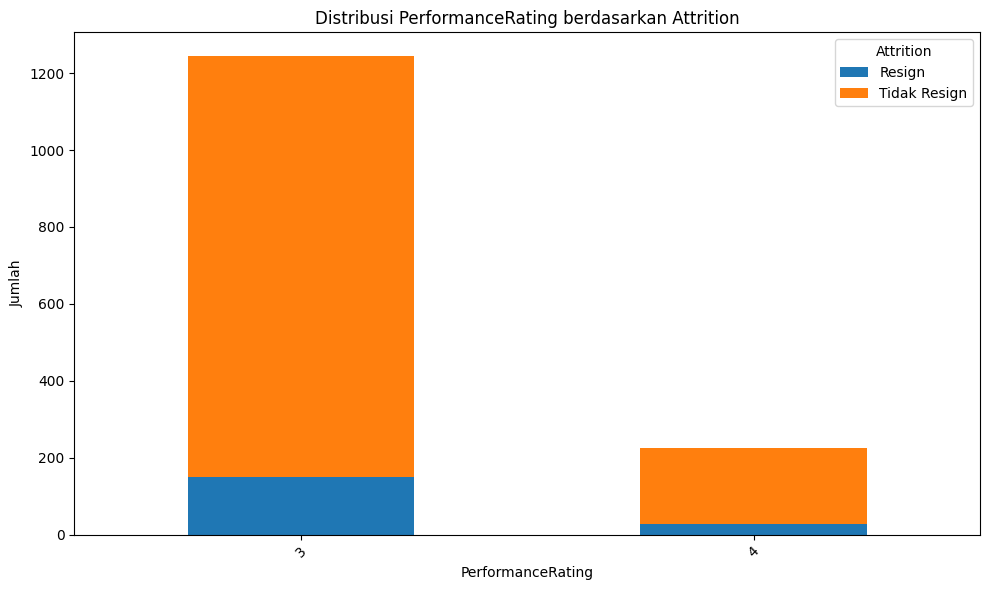

In [ ]:
plot_kategori_bivariate(df_employee_eda, x='PerformanceRating', hue='Attrition')

Berdasarkan hasil visualisasi dan ringkasan data:
- Mayoritas karyawan berada pada rating kinerja 3 (Sangat Baik), dengan tingkat attrition sebesar 16.8%.
- Karyawan dengan rating kinerja tertinggi (4) memiliki tingkat attrition sedikit lebih tinggi, yaitu 17.6%.

**Insight:** Perbedaan tingkat attrition antar rating cukup kecil, sehingga tidak ditemukan hubungan yang kuat antara penilaian kinerja dan kecenderungan untuk keluar dari perusahaan. Ini menunjukkan bahwa meskipun karyawan dinilai berkinerja tinggi, hal tersebut belum tentu menjamin retensi, mungkin karena ada faktor lain seperti kepuasan kerja, pengakuan, atau peluang karier yang lebih memengaruhi keputusan mereka.

#### d. Analisis Pengalaman dan Riwayat Kerja

##### TrainingTimesLastYear

Selanjutnya, dilakukan analisis terhadap variabel `TrainingTimesLastYear`, yaitu `jumlah pelatihan yang diikuti karyawan selama setahun terakhir`, untuk mengetahui apakah intensitas pelatihan berkorelasi dengan kemungkinan karyawan `keluar dari perusahaan (Attrition)`.

Dengan memvisualisasikan distribusi `TrainingTimesLastYear` berdasarkan `status Attrition`, kita dapat melihat apakah ada tren tertentu—misalnya, apakah karyawan yang jarang atau sering ikut pelatihan lebih cenderung keluar dari perusahaan.


Ringkasan untuk kolom: TrainingTimesLastYear
Attrition              Jumlah Attrition=Resign  Jumlah Attrition=Tidak Resign  \
TrainingTimesLastYear                                                           
0                                           13                             41   
1                                            9                             62   
2                                           71                            476   
3                                           48                            443   
4                                           19                            104   
5                                           14                            105   
6                                            5                             60   

Attrition              Persentase Attrition=Resign (%)  \
TrainingTimesLastYear                                    
0                                                24.10   
1                                                1

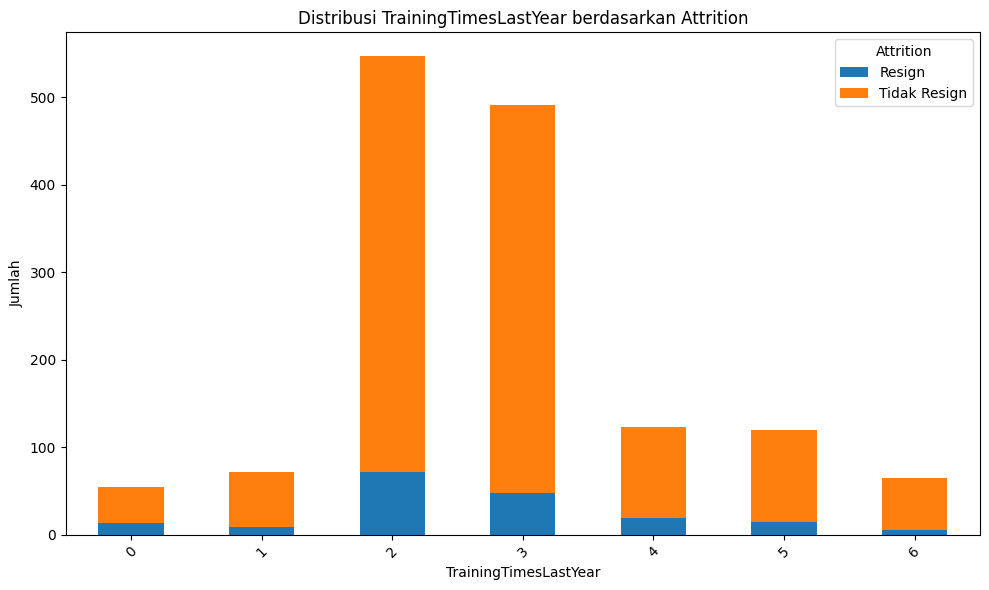

In [ ]:
plot_kategori_bivariate(df_employee_eda, x='TrainingTimesLastYear', hue='Attrition')

Hasil visualisasi dan ringkasan statistik menunjukkan beberapa pola menarik:
- Karyawan yang `tidak pernah mengikuti pelatihan (0 kali)` memiliki tingkat `attrition yang cukup tinggi`, yaitu 24.1%. Ini mengindikasikan bahwa ketiadaan pelatihan bisa menyebabkan ketidakpuasan, karena karyawan mungkin merasa tidak berkembang atau kurang dihargai.
- Tingkat `attrition terendah` ditemukan pada karyawan yang `mengikuti pelatihan sebanyak 6 kali` dalam setahun, dengan angka hanya 7.7%. Ini menunjukkan bahwa pelatihan yang intensif dapat meningkatkan retensi, mungkin karena karyawan merasa diberdayakan dan lebih kompeten.
- Karyawan yang `mengikuti pelatihan 1 hingga 5 kali` memiliki tingkat attrition yang bervariasi namun `relatif lebih rendah` dibanding yang tidak mendapat pelatihan sama sekali

**Insight:** Secara keseluruhan, adanya pelatihan tampaknya berkorelasi dengan peningkatan retensi karyawan. Karyawan yang diberikan pelatihan secara berkala memiliki kemungkinan lebih kecil untuk keluar. Perusahaan perlu mempertimbangkan untuk menyediakan pelatihan secara konsisten dan berkualitas sebagai bagian dari strategi retensi karyawan.

##### YearsAtCompany

`Lama masa kerja karyawan di perusahaan` dapat menjadi indikator penting dalam mengidentifikasi risiko pengunduran diri. Karyawan dengan masa kerja pendek mungkin belum memiliki loyalitas yang kuat, sementara mereka yang telah bekerja lama mungkin lebih stabil atau justru sudah mendekati masa pensiun atau jenuh. Untuk memahami dinamika ini, kita akan memvisualisasikan hubungan antara `lama bekerja di perusahaan (YearsAtCompany)` dengan `attrition (keluar atau tidaknya karyawan)`.


Ringkasan untuk kolom: YearsAtCompany
Attrition       Jumlah Attrition=Resign  Jumlah Attrition=Tidak Resign  \
YearsAtCompany                                                           
0                                    11                             33   
1                                    44                            127   
2                                    19                            108   
3                                    18                            110   
4                                    14                             96   
5                                    15                            181   
6                                     8                             68   
7                                     9                             81   
8                                     8                             72   
9                                     5                             77   
10                                   13                            107   

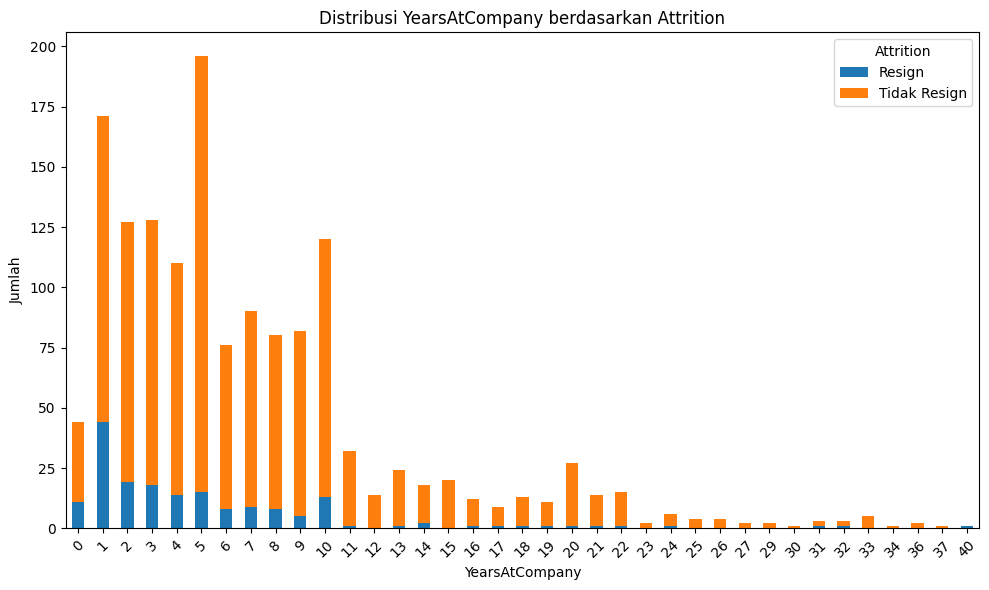

In [ ]:
plot_kategori_bivariate(df_employee_eda, x='YearsAtCompany', hue='Attrition')

Hasil visualisasi memperlihatkan bahwa masa kerja merupakan prediktor yang kuat untuk attrition:
- Karyawan `baru bergabung (0–1 tahun)` memiliki `kemungkinan lebih tinggi untuk mengundurkan diri`. Hal ini mungkin disebabkan oleh ketidakcocokan awal terhadap budaya kerja, ekspektasi yang tidak sesuai, atau belum merasa terikat dengan organisasi.
- Setelah `melewati fase awal (tahun ke-2 hingga ke-5)`, `kemungkinan attrition semakin menurun`, menunjukkan adanya fase adaptasi dan peningkatan stabilitas kerja.
- Pada masa kerja `menengah (5–10 tahun)`, tingkat `attrition tetap rendah`, memperkuat dugaan bahwa mereka yang bertahan cenderung memiliki loyalitas dan kepuasan kerja yang cukup tinggi.
- `Setelah tahun ke-10`, `attrition sangat jarang terjadi`. Ini bisa berarti bahwa karyawan yang telah bekerja lama cenderung menetap hingga pensiun, atau sudah merasa aman dan nyaman dalam posisinya.

**Insight:** Secara keseluruhan, intervensi dan program retensi sebaiknya difokuskan pada karyawan baru di tahun-tahun pertama mereka, karena kelompok ini menunjukkan risiko tertinggi dalam meninggalkan perusahaan. Retensi awal yang efektif dapat berdampak signifikan dalam menekan tingkat attrition secara keseluruhan.

##### NumCompaniesWorked

`Jumlah perusahaan tempat seorang karyawan pernah bekerja sebelumnya` bisa menjadi cerminan dari pola kerja atau stabilitas karier individu tersebut. Karyawan yang sering berpindah-pindah kerja mungkin lebih terbiasa untuk meninggalkan pekerjaan, sementara mereka yang jarang pindah cenderung lebih loyal atau selektif dalam berkarier. Untuk melihat pola ini lebih lanjut, kita akan memvisualisasikan hubungan antara variabel `NumCompaniesWorked` dan `Attrition`.


Ringkasan untuk kolom: NumCompaniesWorked
Attrition           Jumlah Attrition=Resign  Jumlah Attrition=Tidak Resign  \
NumCompaniesWorked                                                           
0                                        19                            178   
1                                        74                            447   
2                                        12                            134   
3                                        11                            148   
4                                        12                            127   
5                                        13                             50   
6                                        11                             59   
7                                        13                             61   
8                                         5                             44   
9                                         9                             43   

Attrition           

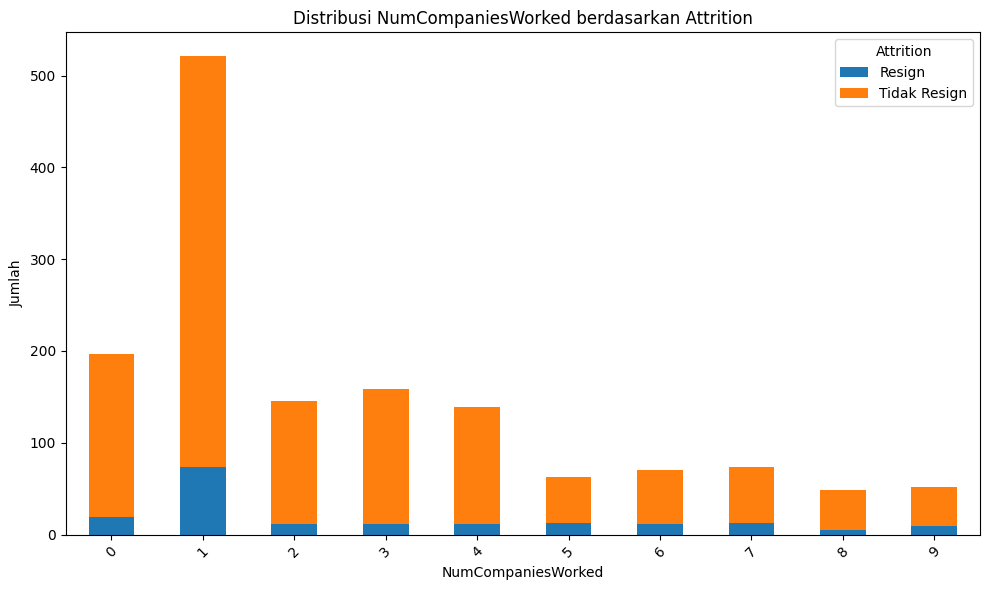

In [ ]:
plot_kategori_bivariate(df_employee_eda, x='NumCompaniesWorked', hue='Attrition')

Visualisasi dan ringkasan statistik menunjukkan bahwa jumlah perusahaan sebelumnya berpengaruh terhadap kecenderungan seorang karyawan untuk keluar:
- Karyawan yang memiliki `riwayat bekerja di lebih dari 5 perusahaan` menunjukkan kecenderungan `attrition yang lebih tinggi`. Hal ini mungkin menunjukkan perilaku job-hopping atau ketidakpuasan jangka panjang, serta kecenderungan untuk tidak bertahan lama di satu perusahaan.
- Di sisi lain, karyawan yang `bekerja di 2–4 perusahaan sebelumnya` memiliki tingkat `attrition yang relatif rendah`, yang bisa menandakan bahwa mereka telah menemukan kecocokan dalam karier mereka saat ini.
- Karyawan yang `belum pernah bekerja di tempat lain (NumCompaniesWorked = 0)` juga menunjukkan tingkat `attrition yang rendah` yaitu 9.6%, menunjukkan bahwa mereka cenderung bertahan, mungkin karena belum memiliki perbandingan atau pengalaman lain.

**Insight:** Secara keseluruhan, riwayat pekerjaan masa lalu dapat menjadi indikator penting dalam proses rekrutmen maupun dalam merancang strategi retensi. Karyawan dengan sejarah kerja yang panjang dan berpindah-pindah perlu mendapat perhatian khusus dalam fase onboarding dan pengembangan karier, untuk meningkatkan komitmen mereka terhadap organisasi.

### 3.1.3. Multivariate Analysis

Attrition                   1.000000
DistanceFromHome            0.078074
NumCompaniesWorked          0.037429
MonthlyRate                 0.023299
PerformanceRating           0.007755
PercentSalaryHike           0.004907
HourlyRate                 -0.017524
EmployeeId                 -0.017912
YearsSinceLastPromotion    -0.031944
Education                  -0.032631
TrainingTimesLastYear      -0.047859
DailyRate                  -0.051992
RelationshipSatisfaction   -0.053417
WorkLifeBalance            -0.059556
JobSatisfaction            -0.091751
EnvironmentSatisfaction    -0.132848
YearsAtCompany             -0.135134
JobInvolvement             -0.150196
YearsWithCurrManager       -0.155962
YearsInCurrentRole         -0.158757
MonthlyIncome              -0.163600
StockOptionLevel           -0.164228
JobLevel                   -0.169201
Age                        -0.172067
TotalWorkingYears          -0.177137
EmployeeCount                    NaN
StandardHours                    NaN
N

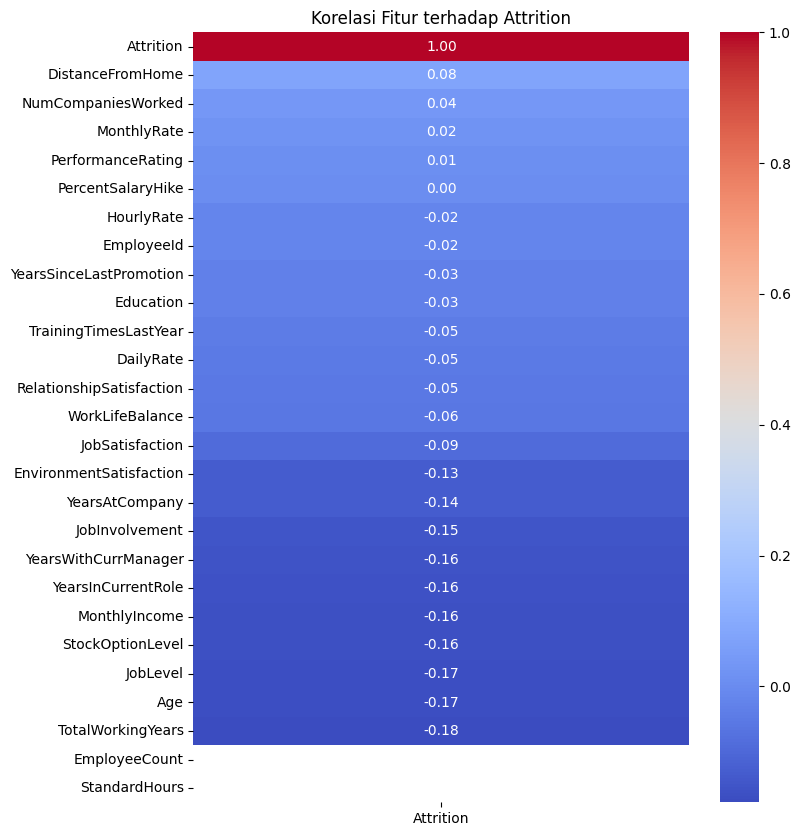

In [ ]:
plt.figure(figsize=(8, 10))

correlation_with_attrition = df_employee.corr(numeric_only=True)['Attrition'].sort_values(ascending=False)
print(correlation_with_attrition)
print("\n")

print("Visualisasi:")
sns.heatmap(correlation_with_attrition.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Korelasi Fitur terhadap Attrition")
plt.show()

## **4. Data Preparation**

In [ ]:
df_employee_cleaned = df_employee.copy()

### 4.1. Menghapus Kolom Yang Tidak Diperlukan

In [ ]:
# Membuang kolom yang tidak dipakai
df_employee_cleaned = df_employee_cleaned.drop(['EmployeeId','StandardHours', 'Over18', 'EmployeeCount', 'PerformanceRating'],axis=1)

# Menampilkan daftar kolom setelah penghapusan untuk memverifikasi bahwa kolom-kolom yang tidak diperlukan telah dihapus
print("\nKolom setelah penghapusan:")
df_employee_cleaned.columns


Kolom setelah penghapusan:


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### 4.2. Mengubah Tipe Data

In [ ]:
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField',
                    'JobLevel', 'JobRole', 'MaritalStatus', 'OverTime', 'StockOptionLevel']

df_employee_cleaned[categorical_cols] = df_employee_cleaned[categorical_cols].astype('category')

In [ ]:
df_employee_cleaned.dtypes

,0
Age,int64
Attrition,category
BusinessTravel,category
DailyRate,int64
Department,category
DistanceFromHome,int64
Education,category
EducationField,category
EnvironmentSatisfaction,int64
Gender,object


In [ ]:
df_employee_cleaned.select_dtypes(include='category').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'JobLevel', 'JobRole', 'MaritalStatus', 'OverTime',
       'StockOptionLevel'],
      dtype='object')

### 4.3. Menangani Missing Values

In [ ]:
missing_target_rows = df_employee_cleaned[df_employee_cleaned['Attrition'].isnull()]

missing_target_rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Yes,11,2,1,7,2,3,6,2,1,2
4,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,No,14,2,3,20,2,3,5,3,0,2
5,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,4,Male,87,2,1,Human Resources,2,Married,2804,15434,1,No,11,4,0,1,3,3,1,0,0,0
12,47,NaN,Travel_Rarely,571,Sales,14,3,Medical,3,Female,78,3,2,Sales Executive,3,Married,4591,24200,3,Yes,17,3,1,11,4,2,5,4,1,2
18,25,NaN,Travel_Frequently,772,Research & Development,2,1,Life Sciences,4,Male,77,4,2,Manufacturing Director,3,Divorced,5206,4973,1,No,17,3,2,7,6,3,7,7,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,24,NaN,Travel_Frequently,567,Research & Development,2,1,Technical Degree,1,Female,32,3,1,Research Scientist,4,Single,3760,17218,1,Yes,13,3,0,6,2,3,6,3,1,3
1447,42,NaN,Travel_Frequently,288,Research & Development,2,3,Life Sciences,4,Male,40,3,3,Healthcare Representative,4,Married,10124,18611,2,Yes,14,3,1,24,3,1,20,8,13,9
1448,38,NaN,Travel_Rarely,437,Sales,16,3,Life Sciences,2,Female,90,3,2,Sales Executive,2,Single,4198,16379,2,No,12,2,0,8,5,4,3,2,1,2
1462,41,NaN,Travel_Rarely,1206,Sales,23,2,Life Sciences,4,Male,80,3,3,Sales Executive,3,Single,7082,11591,3,Yes,16,4,0,21,2,3,2,0,0,2


In [ ]:
df_employee_cleaned = df_employee_cleaned.dropna()

In [ ]:
df_employee_cleaned.isnull().sum().sum()

np.int64(0)

In [ ]:
df_employee_cleaned['Attrition'].value_counts()

,count
Attrition,
0.00,879
1.00,179


### 4.4. Menangani Outliers

In [ ]:
# Tentukan kolom numerik yang ingin digunakan
selected_numeric_cols = df_employee_cleaned.select_dtypes(include=['number']).columns
selected_numeric_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Ambil subset dari dataframe hanya untuk kolom numerik
df_numeric = df_employee_cleaned[selected_numeric_cols]

# Hitung Q1, Q3, dan IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

# Hapus outlier dari df_loan berdasarkan selected_numeric_cols
df_employee_cleaned = df_employee_cleaned[~((df_numeric < (minimum)) | (df_numeric > (maximum))).any(axis = 1)]

In [ ]:
print("Ukuran Dataset Asli:")
print(df_employee.shape)
print("Ukuran Dataset Setelah Penghapusan Outlier:")
print(df_employee_cleaned.shape)

Ukuran Dataset Asli:
(1470, 35)
Ukuran Dataset Setelah Penghapusan Outlier:
(715, 30)


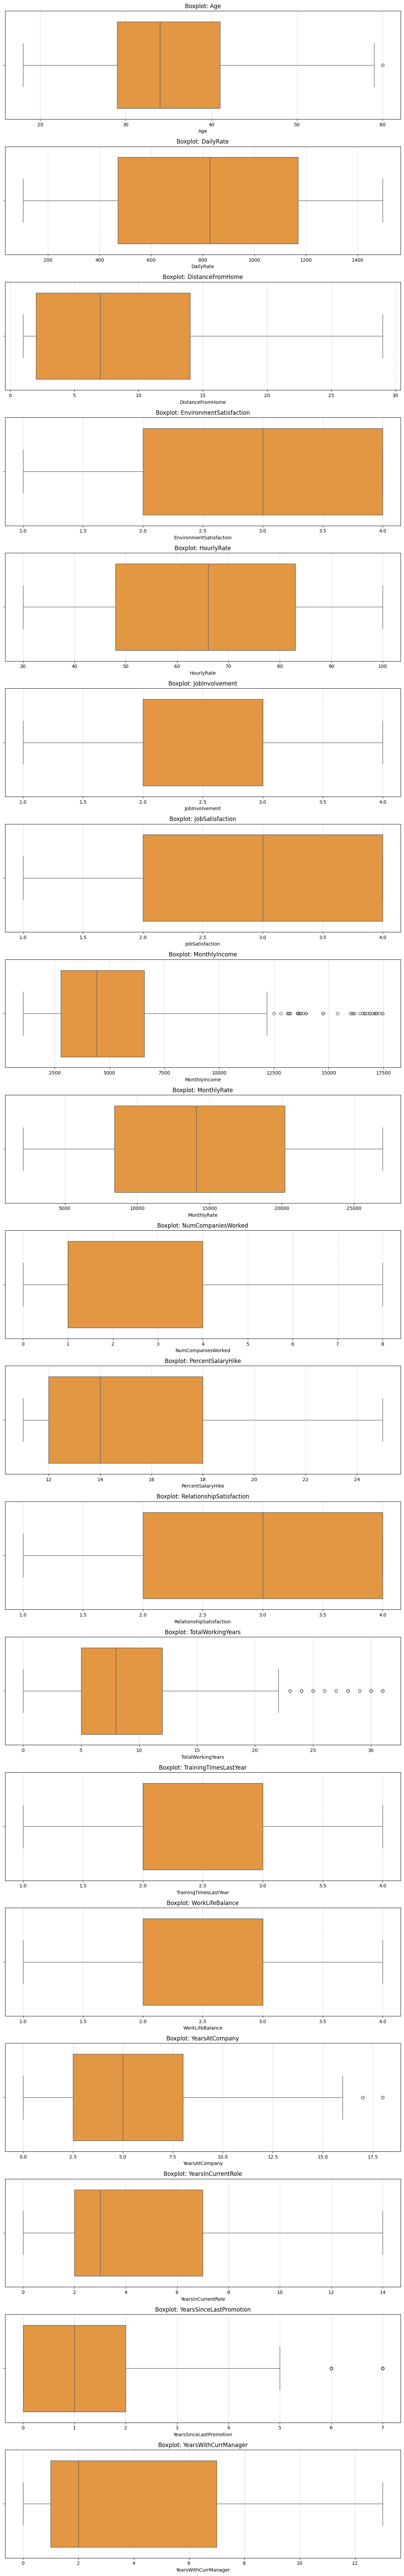

In [ ]:
plot_numeric_boxplots(df_employee_cleaned)

### 4.5. Dashboard Eksploratif

In [ ]:
df_employee_dashboard = df_employee_cleaned.copy()

In [ ]:
# Mapping nilai kategorikal
satisfaction_mapping = {1: "Rendah", 2: "Sedang", 3: "Tinggi", 4: "Sangat Tinggi"}
education_mapping = {1: "SMP/SMA", 2: "Diploma (D3/D4)", 3: "Sarjana (S1)", 4: "Magister (S2)", 5: "Doktor (S3)"}
# worklifebalance_mapping = {1: "Rendah", 2: "Baik", 3: "Sangat Baik", 4: "Luar Biasa"}
attrition_mapping = {1: "Resign", 0: "Tidak Resign"}
# marital_status_mapping = {"Single": "Lajang", "Married": "Menikah", "Divorced": "Cerai"}
business_travel_mapping = {"Travel_Rarely": "Rarely", "Travel_Frequently": "Frequently", "Non-Travel": "Never"}
# overtime_mapping = {"Yes": "Ya", "No": "Tidak"}

# Terapkan reverse mapping
df_employee_dashboard['Attrition'] = df_employee_dashboard['Attrition'].map(attrition_mapping)
# df_employee_dashboard['EnvironmentSatisfaction'] = df_employee_dashboard['EnvironmentSatisfaction'].map(satisfaction_mapping)
# df_employee_dashboard['JobInvolvement'] = df_employee_dashboard['JobInvolvement'].map(satisfaction_mapping)
# df_employee_dashboard['JobSatisfaction'] = df_employee_dashboard['JobSatisfaction'].map(satisfaction_mapping)
# df_employee_dashboard['RelationshipSatisfaction'] = df_employee_dashboard['RelationshipSatisfaction'].map(satisfaction_mapping)
df_employee_dashboard['Education'] = df_employee_dashboard['Education'].map(education_mapping)
# df_employee_dashboard['WorkLifeBalance'] = df_employee_dashboard['WorkLifeBalance'].map(worklifebalance_mapping)
# df_employee_dashboard['MaritalStatus'] = df_employee_dashboard['MaritalStatus'].map(marital_status_mapping)
df_employee_dashboard['BusinessTravel'] = df_employee_dashboard['BusinessTravel'].map(business_travel_mapping)
# df_employee_dashboard['OverTime'] = df_employee_dashboard['OverTime'].map(overtime_mapping)

In [ ]:
df_employee_dashboard['WorkLifeBalance'].value_counts()

,count
WorkLifeBalance,
3,425
2,169
4,83
1,38


In [ ]:
df_employee_dashboard

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,Resign,Rarely,1141,Research & Development,11,Diploma (D3/D4),Medical,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,No,15,1,0,15,2,1,1,0,0,0
6,40,Tidak Resign,Rarely,1124,Sales,1,Diploma (D3/D4),Medical,2,Male,57,1,2,Sales Executive,4,Married,7457,13273,2,Yes,22,3,3,6,2,2,4,3,0,2
8,36,Tidak Resign,Frequently,635,Research & Development,18,SMP/SMA,Medical,2,Female,73,3,1,Laboratory Technician,4,Single,2153,7703,1,No,13,1,0,8,2,3,8,1,1,7
10,25,Tidak Resign,Rarely,583,Sales,4,SMP/SMA,Marketing,3,Male,87,2,2,Sales Executive,1,Married,4256,18154,1,No,12,1,0,5,1,4,5,2,0,3
11,20,Resign,Rarely,129,Research & Development,4,Sarjana (S1),Technical Degree,1,Male,84,3,1,Laboratory Technician,1,Single,2973,13008,1,No,19,2,0,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48,Tidak Resign,Never,1262,Research & Development,1,Magister (S2),Medical,1,Male,35,4,4,Manager,4,Single,16885,16154,2,No,22,3,0,27,3,2,5,4,2,1
1461,44,Tidak Resign,Rarely,1467,Research & Development,20,Sarjana (S1),Life Sciences,4,Male,49,3,1,Research Scientist,2,Single,3420,21158,1,No,13,3,0,6,3,2,5,2,1,3
1464,28,Resign,Never,1366,Research & Development,24,Diploma (D3/D4),Technical Degree,2,Male,72,2,3,Healthcare Representative,1,Single,8722,12355,1,No,12,1,0,10,2,2,10,7,1,9
1465,38,Tidak Resign,Rarely,168,Research & Development,1,Sarjana (S1),Life Sciences,3,Female,81,3,3,Manufacturing Director,3,Single,7861,15397,4,Yes,14,4,0,10,4,4,1,0,0,0


#### Menghubungkan Metabase dengan Database

In [ ]:
from sqlalchemy import create_engine

# Ganti sesuai konfigurasi kamu
user = "postgres.extldrxngkskakcegjko"  # Format `user configuration` -> `DatabaseName.ProjectID`
password = "Mustikasari02"              # Ganti dengan password dari Supabase DB -> `bpds-submission1`
host = "aws-0-ap-southeast-1.pooler.supabase.com"
port = 6543
database = "postgres"

# Format connection string
URL = f"postgresql://{user}:{password}@{host}:{port}/{database}"

# Buat engine
engine = create_engine(URL)

# Kirim DataFrame ke tabel 'hr_employee_data'
df_employee_dashboard.to_sql('hr_employee_data', engine, if_exists='replace', index=False)

715

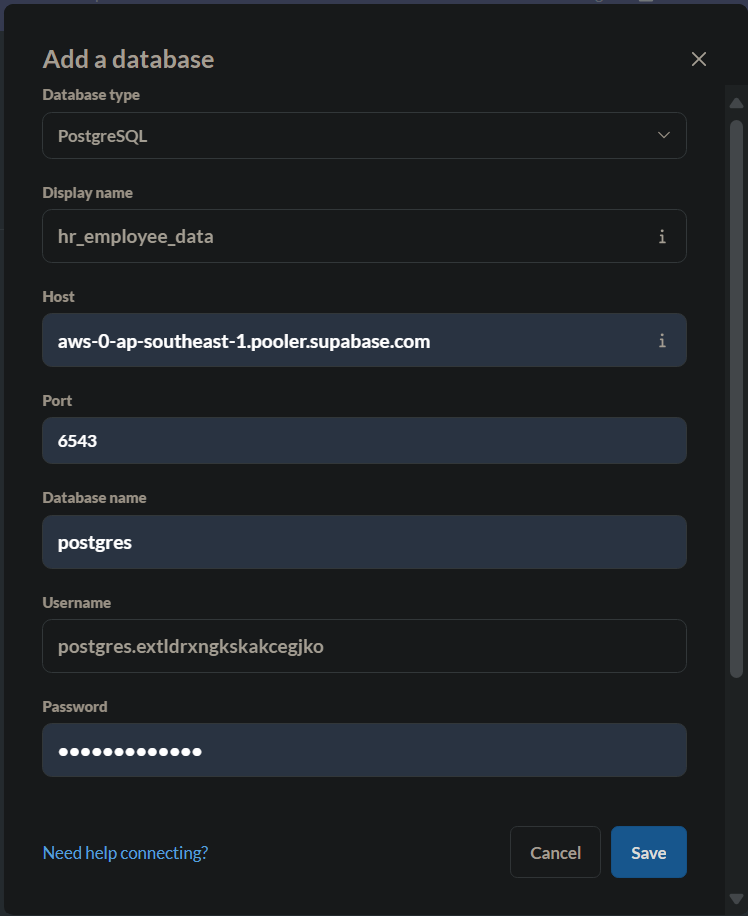

#### Menyesuaikan Data Schema

In [ ]:
df_employee_dashboard.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 1 to 1467
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       715 non-null    int64   
 1   Attrition                 715 non-null    category
 2   BusinessTravel            715 non-null    category
 3   DailyRate                 715 non-null    int64   
 4   Department                715 non-null    category
 5   DistanceFromHome          715 non-null    int64   
 6   Education                 715 non-null    category
 7   EducationField            715 non-null    category
 8   EnvironmentSatisfaction   715 non-null    int64   
 9   HourlyRate                715 non-null    int64   
 10  JobInvolvement            715 non-null    category
 11  JobLevel                  715 non-null    category
 12  JobRole                   715 non-null    category
 13  JobSatisfaction           715 non-null    int64   
 14

| Kolom                    | Tipe Data  |
| ------------------------ | ---------- |
| Age                      | Quantity   |
| Attrition                | Category   |
| BusinessTravel           | Category   |
| DailyRate                | Income     |
| Department               | Category   |
| DistanceFromHome         | Quantity   |
| Education                | Category   |
| EducationField           | Category   |
| EnvironmentSatisfaction  | Score      |
| Gender                   | Category   |
| HourlyRate               | Income     |
| JobInvolvement           | Score      |
| JobLevel                 | Category   |
| JobRole                  | Category   |
| JobSatisfaction          | Score      |
| MaritalStatus            | Category   |
| MonthlyIncome            | Income     |
| MonthlyRate              | Income     |
| NumCompaniesWorked       | Quantity   |
| OverTime                 | Category   |
| PercentSalaryHike        | Percentage |
| RelationshipSatisfaction | Score      |
| StockOptionLevel         | Category   |
| TotalWorkingYears        | Quantity   |
| TrainingTimesLastYear    | Quantity   |
| WorkLifeBalance          | Score      |
| YearsAtCompany           | Quantity   |
| YearsInCurrentRole       | Quantity   |
| YearsSinceLastPromotion  | Quantity   |
| YearsWithCurrManager     | Quantity   |


### 4.5. Encoding Fitur Kategorikal

In [ ]:
df_employee_encoded = df_employee_cleaned.copy()

In [ ]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['Attrition', 'BusinessTravel','Department', 'EducationField', 'JobRole', 'OverTime', 'MaritalStatus',
                       'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                       'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

# Encode kolom kategorikal
for column in categorical_columns:
    df_employee_encoded[column] = label_encoder.fit_transform(df_employee_encoded[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
print(df_employee_encoded[['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']])

      Attrition  BusinessTravel  Department  Education  EducationField  \
1             1               2           1          1               3   
6             0               2           2          1               3   
8             0               1           1          0               3   
10            0               2           2          0               2   
11            1               2           1          2               5   
...         ...             ...         ...        ...             ...   
1460          0               0           1          3               3   
1461          0               2           1          2               1   
1464          1               0           1          1               5   
1465          0               2           1          2               1   
1467          1               2           1          0               1   

      EnvironmentSatisfaction  JobInvolvement  JobLevel  JobRole  \
1                           0              

### 4.6. Normalisasi Data

In [ ]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = df_employee_encoded.select_dtypes(include=['int64', 'float64']).columns
df_employee_encoded[numeric_columns] = scaler.fit_transform(df_employee_encoded[numeric_columns])

df_employee_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,0.45,1.00,1.00,0.74,0.50,0.36,0.25,0.60,0.00,0.44,0.00,0.33,0.00,0.33,0.50,0.23,0.49,0.62,0.00,0.29,0.00,0.00,0.48,0.33,0.00,0.06,0.00,0.00,0.00
6,0.52,0.00,1.00,0.73,1.00,0.00,0.25,0.60,0.33,0.39,0.00,0.33,0.88,1.00,0.50,0.39,0.45,0.25,1.00,0.79,0.67,1.00,0.19,0.33,0.33,0.22,0.21,0.00,0.15
8,0.43,0.00,0.50,0.38,0.50,0.61,0.00,0.60,0.33,0.61,0.67,0.00,0.25,1.00,1.00,0.07,0.22,0.12,0.00,0.14,0.00,0.00,0.26,0.33,0.67,0.44,0.07,0.14,0.54
10,0.17,0.00,1.00,0.34,1.00,0.11,0.00,0.40,0.67,0.81,0.33,0.33,0.88,0.00,0.50,0.20,0.65,0.12,0.00,0.07,0.00,0.00,0.16,0.00,1.00,0.28,0.14,0.00,0.23
11,0.05,1.00,1.00,0.02,0.50,0.11,0.50,1.00,0.00,0.77,0.67,0.00,0.25,0.00,1.00,0.12,0.44,0.12,0.00,0.57,0.33,0.00,0.03,0.33,0.67,0.06,0.00,0.00,0.00


### 4.7. Splitting Data

In [ ]:
# Pisahkan fitur dan target
X = df_employee_encoded.drop(['Attrition'], axis=1)
y = df_employee_encoded['Attrition']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print("Training set shape:")
print(f"X_train={X_train.shape}")
print(f"y_train={y_train.shape} \n")
print("Test set shape:")
print(f"X_train={X_test.shape}")
print(f"y_train={y_test.shape}")

Training set shape:
X_train=(536, 28)
y_train=(536,) 

Test set shape:
X_train=(179, 28)
y_train=(179,)


In [ ]:
print(f'Jumlah total data:: {len(X)}')
print(f'Jumlah data latih: {len(X_train)}')
print(f'Jumlah data test: {len(X_test)}')

Jumlah total data:: 715
Jumlah data latih: 536
Jumlah data test: 179


## **5. Model Development**

In [ ]:
def evaluate_model(y_true, y_pred, model_name="Model", train_accuracy=None, target_names=None):
    """
    Menampilkan evaluasi lengkap: Confusion Matrix, classification report, dan metrik evaluasi.

    Parameters:
    - y_true: array-like, label sebenarnya
    - y_pred: array-like, label hasil prediksi
    - model_name: str, nama model (default: "Model")
    - train_accuracy: float, akurasi pada data latih (opsional)
    - target_names: list of str, nama label untuk classification report
    """
    # Metode evaluasi
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    print(f"🛑 EVALUASI MODEL {model_name.upper()}")
    print("=" * 60)
    print(f"Accuracy : {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall   : {recall:.2f}")
    print(f"F1 Score : {f1:.2f}\n")

    print(f"🛑 CLASSIFICATION REPORT")
    print("=" * 60)
    print(classification_report(y_true, y_pred, target_names=target_names))
    print("=" * 60)
    if train_accuracy is not None:
        print(f"*{model_name.upper()} - Akurasi pada data latih: {train_accuracy:.4f}")
    print(f"*{model_name.upper()} - Akurasi pada data uji: {accuracy:.4f}")
    print("=" * 60)
    print("\n")
    print("Visualisasi:")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(ax=ax, cmap='Blues', colorbar=True)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.tight_layout()
    plt.show()

### Pemilihan Model

In [ ]:
clf = LazyClassifier()
models, predicts = clf.fit(X_train, X_test, y_train, y_test)

print(models.sort_values(by="Accuracy", ascending=False))

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 94, number of negative: 442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 869
[LightGBM] [Info] Number of data points in the train set: 536, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.175373 -> initscore=-1.548015
[LightGBM] [Info] Start training from score -1.548015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


### Modeling & Evaluation

In [ ]:
from sklearn.linear_model import Perceptron

model_perceptron = Perceptron(max_iter=1000, random_state=42)
model_perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

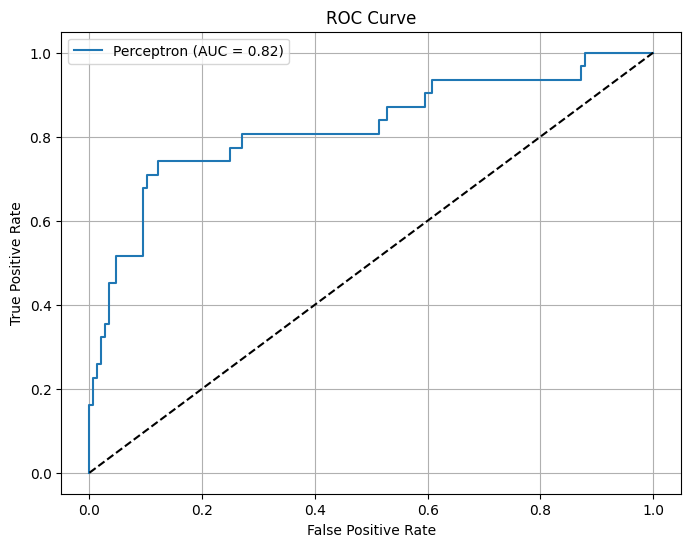

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score, roc_curve

# Prediksi skor dengan decision_function
y_scores = model_perceptron.decision_function(X_test)

# Hitung ROC-AUC
roc_auc = roc_auc_score(y_test, y_scores)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Perceptron (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Garis random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

🛑 EVALUASI MODEL LINEAR DISCRIMINANT ANALYSIS
Accuracy : 0.86
Precision: 0.87
Recall   : 0.86
F1 Score : 0.86

🛑 CLASSIFICATION REPORT
              precision    recall  f1-score   support

Tidak Resign       0.93      0.90      0.91       148
      Resign       0.58      0.68      0.63        31

    accuracy                           0.86       179
   macro avg       0.76      0.79      0.77       179
weighted avg       0.87      0.86      0.86       179

*LINEAR DISCRIMINANT ANALYSIS - Akurasi pada data latih: 0.8582
*LINEAR DISCRIMINANT ANALYSIS - Akurasi pada data uji: 0.8603


Visualisasi:


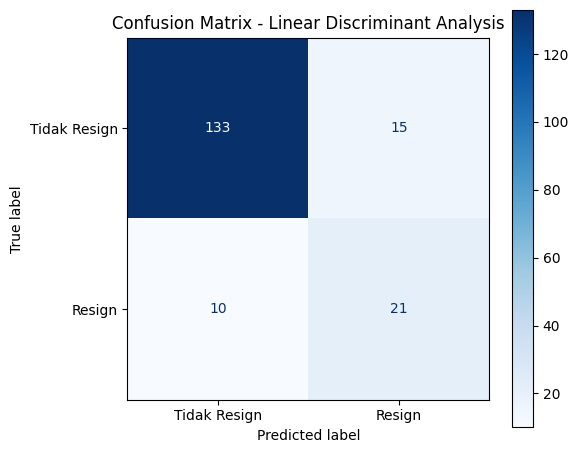

In [ ]:
y_pred_LDA = model_perceptron.predict(X_test)

evaluate_model(
    y_true=y_test,
    y_pred=y_pred_LDA,
    model_name="Linear Discriminant Analysis",
    train_accuracy=model_perceptron.score(X_train, y_train),
    target_names=['Tidak Resign', 'Resign']
)

### Pemilihan Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

importances = model_rf.feature_importances_
rf_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(rf_importance)

Age                        0.07
MonthlyIncome              0.07
DailyRate                  0.06
OverTime                   0.06
MonthlyRate                0.06
TotalWorkingYears          0.05
EnvironmentSatisfaction    0.04
DistanceFromHome           0.04
HourlyRate                 0.04
YearsAtCompany             0.04
PercentSalaryHike          0.04
JobRole                    0.04
NumCompaniesWorked         0.03
JobSatisfaction            0.03
EducationField             0.03
YearsWithCurrManager       0.03
StockOptionLevel           0.03
WorkLifeBalance            0.03
RelationshipSatisfaction   0.03
JobInvolvement             0.03
MaritalStatus              0.02
YearsInCurrentRole         0.02
Education                  0.02
JobLevel                   0.02
YearsSinceLastPromotion    0.02
TrainingTimesLastYear      0.02
BusinessTravel             0.01
Department                 0.01
dtype: float64


In [ ]:
# Ambil importance fitur
importances = model_rf.feature_importances_
feat_importances = pd.Series(importances, index=X_train.columns)

# Tentukan threshold, misal 0.04
threshold = 0.04

# Pilih fitur yang importance-nya >= threshold
selected_features = feat_importances[feat_importances >= threshold].index.tolist()
print("Fitur terpilih:", selected_features)

Fitur terpilih: ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'OverTime', 'TotalWorkingYears', 'YearsAtCompany']


In [ ]:
# Fit ulang model dengan fitur terpilih
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

model_rf_sel = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_sel.fit(X_train_sel, y_train)

# Prediksi dan evaluasi
y_pred = model_rf_sel.predict(X_test_sel)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91       148
         1.0       0.70      0.23      0.34        31

    accuracy                           0.85       179
   macro avg       0.78      0.60      0.63       179
weighted avg       0.83      0.85      0.82       179



### Konversi Model

In [ ]:
import pickle
import joblib

In [ ]:
os.makedirs("models", exist_ok=True)

# Simpan model
joblib.dump(model_perceptron, 'models/model_perceptron.pkl')

# Simpan model ke file .pkl
with open('models/model_random_forest.pkl', 'wb') as f:
    pickle.dump(model_rf_sel, f)

# Simpan model ke file .joblib
joblib.dump(model_rf_sel, 'models/model_random_forest.joblib')

['models/model_random_forest.joblib']